In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df1 = pd.read_csv('users.csv')
df2 = pd.read_csv('devices.csv')
df3 = pd.read_csv('notifications.csv')
df4 = pd.read_csv('transactions_1.csv')
df5 = pd.read_csv('transactions_2.csv')
df6 = pd.read_csv('transactions_3.csv')
combo = pd.concat([df4,df5,df6], ignore_index = True)
df1 = pd.merge(df1, df2, on = 'user_id')

## Exploratory Data Analysis on "users" dataset 

### Check for missing values in the "users" dataset

In [234]:
df1.isna().sum()

user_id                                        0
birth_year                                     0
country                                        0
city                                           0
created_date                                   0
user_settings_crypto_unlocked                  0
plan                                           0
attributes_notifications_marketing_push     5260
attributes_notifications_marketing_email    5260
num_contacts                                   0
num_referrals                                  0
num_successful_referrals                       0
brand                                          0
dtype: int64

### Check that users with missing values in the "attributes_notifications_marketing_push" variable have missing values in the "attributes_notifications_marketing_email" and vice versa.

In [235]:
index1 = df1['attributes_notifications_marketing_push'].index[df1['attributes_notifications_marketing_push'].apply(np.isnan)]
index2 = df1['attributes_notifications_marketing_email'].index[df1['attributes_notifications_marketing_email'].apply(np.isnan)]
df1_index = df1.index.values.tolist()


[df1_index.index(i) for i in index1] == [df1_index.index(i) for i in index2]


True

### Get some descriptive statistics

In [236]:
df1.describe()

,birth_year,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
count,15544.000000,15544.000000,10284.000000,10284.000000,15544.000000,15544.0,15544.0
mean,1983.666624,0.182385,0.948269,0.895469,17.874228,0.0,0.0
std,11.369184,0.386174,0.221494,0.305963,47.549929,0.0,0.0
min,1929.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1977.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0
50%,1986.000000,0.000000,1.000000,1.000000,5.000000,0.0,0.0
75%,1992.000000,0.000000,1.000000,1.000000,19.000000,0.0,0.0
max,2001.000000,1.000000,1.000000,1.000000,2918.000000,0.0,0.0


### Feature Engineering

In [237]:
df1['age'] = 2020 - df1['birth_year']
del df1['birth_year']
del df1['num_referrals']
del df1['num_successful_referrals']
df1

,user_id,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,brand,age
0,user_0,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,Apple,28
1,user_1,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,Apple,35
2,user_2,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,NaN,NaN,71,Apple,24
3,user_3,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,NaN,NaN,219,Apple,39
4,user_4,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,NaN,NaN,0,Apple,28
...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,PL,Bralin,2018-08-05 05:56:40.787458,0,STANDARD,1.0,1.0,0,Android,23
15540,user_15540,PL,Poznań,2018-03-29 12:19:05.567779,0,STANDARD,NaN,NaN,0,Apple,35
15541,user_15541,GB,London,2018-07-13 15:56:50.339746,0,STANDARD,1.0,1.0,16,Android,42
15542,user_15542,IE,Dublin,2018-01-07 15:53:43.719983,0,GOLD,1.0,1.0,44,Apple,43


In [238]:
df1['country'].value_counts()

GB    5018
PL    1834
FR    1696
IE     995
RO     873
ES     784
LT     541
PT     487
MT     437
DE     358
CH     350
CZ     287
IT     241
GR     182
CY     154
LV     133
NL     132
HU     125
BE     113
SE     104
BG      78
DK      77
NO      75
SI      71
AT      68
SK      65
HR      49
JE      45
GI      35
FI      32
EE      30
LU      21
GG      14
GP       9
RE       7
IM       7
IS       6
LI       4
AU       4
MQ       3
Name: country, dtype: int64

In [239]:
df1['city'].value_counts()

London          1342
Warszawa         330
Paris            292
Dublin           286
Vilnius          271
                ... 
La Verrière        1
Ermesinde          1
Los Realejos       1
Sigtuna            1
Cullera            1
Name: city, Length: 5197, dtype: int64

In [240]:
df1['user_settings_crypto_unlocked'].value_counts()

0    12709
1     2835
Name: user_settings_crypto_unlocked, dtype: int64

In [241]:
df1['plan'].value_counts()

STANDARD    14394
SILVER        713
GOLD          437
Name: plan, dtype: int64

Encode the 'plan' because of sequential nature.

In [242]:
df1['attributes_notifications_marketing_push'].value_counts()

1.0    9752
0.0     532
Name: attributes_notifications_marketing_push, dtype: int64

In [243]:
df1['attributes_notifications_marketing_email'].value_counts()

1.0    9209
0.0    1075
Name: attributes_notifications_marketing_email, dtype: int64

In [244]:
df1['num_contacts'].value_counts()

0      5539
2       547
1       526
3       525
4       489
       ... 
212       1
236       1
244       1
252       1
379       1
Name: num_contacts, Length: 283, dtype: int64

In [245]:
df1['brand'].value_counts()

Android    7800
Apple      7712
Unknown      32
Name: brand, dtype: int64

In [246]:
df1['age_categories'] = pd.cut(df1.age, 3, labels=['young', 'middle aged', 'old'])
df1['age_categories'].value_counts()

young          11951
middle aged     3355
old              238
Name: age_categories, dtype: int64

In [247]:
df1['attributes_notifications_marketing_email'].fillna(0, inplace=True)

In [248]:
df1['attributes_notifications_marketing_push'].fillna(0, inplace=True)

In [249]:
year_us = []
month_us = []
day_us = []
for i in df1['created_date']:
    year_us.append(int(i[:4]))
    month_us.append(int(i[5:7]))
    day_us.append(int(i[8:10]))
df1['year_us'] = year_us
df1['month_us'] = month_us
df1['day_us'] = day_us
del df1['created_date']

In [250]:
df1.month_us = df1.month_us.replace({1:'Q1', 2:'Q1', 3:'Q1',4:'Q2', 5:'Q2', 6:'Q2',
                                      7:'Q3', 8:'Q3', 9:'Q3',10:'Q4', 11:'Q4', 12:'Q4'
                                      })

df1.day_us = pd.cut(df1.day_us, 3, labels=[1, 2, 3])

In [251]:
df1.country = df1.country.replace({'CH':'Other','JE':'Other','AU':'Other','MQ':'Other','GP':'Other','RE':'Other',
                                   'ES':'SE','PT':'SE','FR':'SE','CY':'SE','IT':'SE','GR':'SE','MT':'SE','BG':'SE','SE':'SE','GI':'SE','HR':'SE',
                                   'LT':'EE','BE':'EE','RO':'EE','PL':'EE','LV':'EE','EE':'EE','HU':'EE','SK':'EE',
                                   'CZ':'CE','LU':'CE','LI':'CE','AT':'CE','DE':'CE','SI':'CE','NL':'CE',
                                   'DK':'NE','IE':'NE','NO':'NE','FI':'NE','GB':'NE','IM':'NE','GG':'NE', 'IS':'NE'
                                   })

In [252]:
df1.head(10)

,user_id,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,brand,age,age_categories,year_us,month_us,day_us
0,user_0,SE,Madrid,0,STANDARD,1.0,1.0,3,Apple,28,young,2018,Q3,1
1,user_1,EE,Klaipeda,1,STANDARD,0.0,0.0,75,Apple,35,young,2018,Q1,1
2,user_2,NE,Carrickmacross,0,STANDARD,0.0,0.0,71,Apple,24,young,2018,Q4,3
3,user_3,NE,Dublin,0,STANDARD,0.0,0.0,219,Apple,39,young,2018,Q1,2
4,user_4,NE,London,0,STANDARD,0.0,0.0,0,Apple,28,young,2018,Q1,1
5,user_5,NE,Glasgow,0,STANDARD,1.0,1.0,0,Apple,30,young,2018,Q3,3
6,user_6,SE,Santa Venera,1,STANDARD,1.0,1.0,77,Apple,22,young,2018,Q3,2
7,user_7,SE,Villejuif,0,STANDARD,0.0,0.0,10,Android,28,young,2018,Q1,1
8,user_8,NE,Co.kerry,0,STANDARD,0.0,0.0,42,Android,28,young,2018,Q3,3
9,user_9,NE,Rugby,1,STANDARD,1.0,1.0,3,Android,35,young,2018,Q1,2


In [253]:
df1['year_us'].value_counts()

2018    15494
2019       50
Name: year_us, dtype: int64

In [254]:
df1['month_us'].value_counts()

Q4    4931
Q3    4065
Q2    3485
Q1    3063
Name: month_us, dtype: int64

In [255]:
df1['day_us'].value_counts()

1    5803
2    4946
3    4795
Name: day_us, dtype: int64

## Visualizations

#### Donut Plot: Plan by Region (Europe - Other Countries)

In [256]:
counter_in_eu_stand = len(df1[(df1.plan == 'STANDARD') &   (df1.country == 'SE')]) + len(df1[(df1.plan == 'STANDARD') &   (df1.country == 'CE')]) +len(df1[(df1.plan == 'STANDARD') &   (df1.country == 'NE')]) +len(df1[(df1.plan == 'STANDARD') &   (df1.country == 'EE')])
counter_in_other_stand = len(df1[(df1.plan == 'STANDARD') &   (df1.country == 'Other')])

counter_in_eu_gold = len(df1[(df1.plan == 'GOLD') &   (df1.country == 'SE')]) +len(df1[(df1.plan == 'GOLD') &   (df1.country == 'CE')]) + len(df1[(df1.plan == 'GOLD') &   (df1.country == 'NE')]) +len(df1[(df1.plan == 'GOLD') &   (df1.country == 'EE')])
counter_in_other_gold = len(df1[(df1.plan == 'GOLD') &   (df1.country == 'Other')])

counter_in_eu_silv = len(df1[(df1.plan == 'SILVER') &   (df1.country == 'SE')]) + len(df1[(df1.plan == 'SILVER') &   (df1.country == 'CE')]) + len(df1[(df1.plan == 'SILVER') &   (df1.country == 'NE')]) +len(df1[(df1.plan == 'SILVER') &   (df1.country == 'EE')])
counter_in_other_silv = len(df1[(df1.plan == 'SILVER') &   (df1.country == 'Other')])

# create data
names=df1['plan'].unique()
size=[len(df1['user_id'][df1['plan']== 'STANDARD']), len(df1['user_id'][df1['plan']== 'GOLD']),len(df1['user_id'][df1['plan']== 'SILVER'])]

# Make data: I have 3 groups and 6 subgroups
group_names=['STANDARD', 'GOLD', 'SILVER']
group_size=[len(df1['user_id'][df1['plan']== 'STANDARD']),len(df1['user_id'][df1['plan']== 'GOLD']),len(df1['user_id'][df1['plan']== 'SILVER'])]
subgroup_names=['STAND_IN_EU', 'STAND_IN_OTH', 'GOLD_IN_EU', 'GOLD_IN_OTH', 'SILV_IN_EU', 'SILV_IN_OTH']
subgroup_size=[counter_in_eu_stand , counter_in_other_stand , counter_in_eu_gold , counter_in_other_gold , counter_in_eu_silv , counter_in_other_silv]

percent_subgroup= {'STAND_IN_EU':format(14033/15544, '.2%'), 'STAND_IN_OTH':format(361/15544, '.2%'), 'GOLD_IN_EU' : format(405/15544, '.2%'),'GOLD_IN_OTH' :format(32/15544, '.2%'),'SILV_IN_EU':format(688/15544, '.2%'),'SILV_IN_OTH' :format(5/15544, '.2%')}
print(percent_subgroup)

{'STAND_IN_EU': '90.28%', 'STAND_IN_OTH': '2.32%', 'GOLD_IN_EU': '2.61%', 'GOLD_IN_OTH': '0.21%', 'SILV_IN_EU': '4.43%', 'SILV_IN_OTH': '0.03%'}


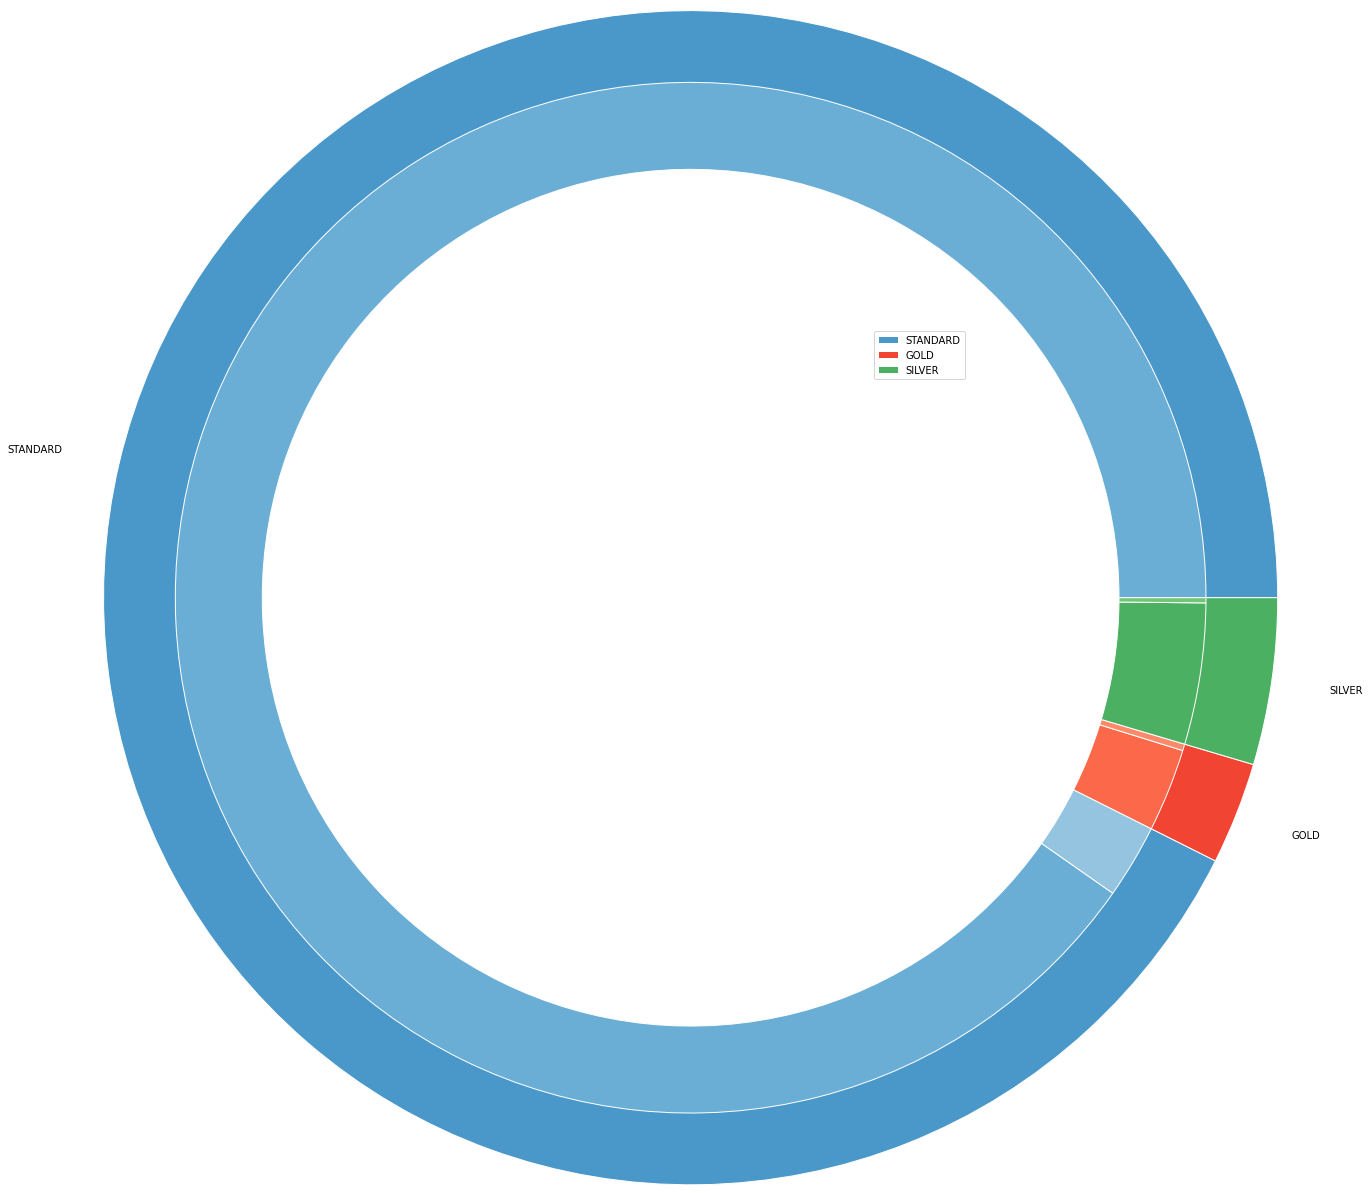

In [257]:
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.7, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.5, edgecolor='white')
plt.legend()
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=2.7-0.33,  labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

#### Barplot: Percentages of the users based on their plan and brand

In [258]:
apple_and_standard = len(df1[(df1.plan == 'STANDARD') & (df1.brand == 'Apple')])
apple_and_gold = len(df1[(df1.plan == 'GOLD') & (df1.brand == 'Apple')])
apple_and_silver = len(df1[(df1.plan == 'SILVER') & (df1.brand == 'Apple')])

android_and_standard = len(df1[(df1.plan == 'STANDARD') & (df1.brand == 'Android')])
android_and_gold = len(df1[(df1.plan == 'GOLD') & (df1.brand == 'Android')])
android_and_silver = len(df1[(df1.plan == 'SILVER') & (df1.brand == 'Android')])

unknown_and_standard = len(df1[(df1.plan == 'STANDARD') & (df1.brand == 'Unknown')])
unknown_and_gold = len(df1[(df1.plan == 'GOLD') & (df1.brand == 'Unknown')])
unknown_and_silver = len(df1[(df1.plan == 'SILVER') & (df1.brand == 'Unknown')])

x= ['Ap & St', 'Ap & Gold' , 'Ap & Silv', 'Andr & St', 'Andr & Gold',  'Andr & Silv','Un & St', 'Un & Gold', ' Un & Silv' ]
y = [apple_and_standard,android_and_standard,apple_and_gold, android_and_gold,apple_and_silver,android_and_silver]

for i in range(6):
  y[i] = y[i]/15544
  y[i] = format(y[i], '.2%')


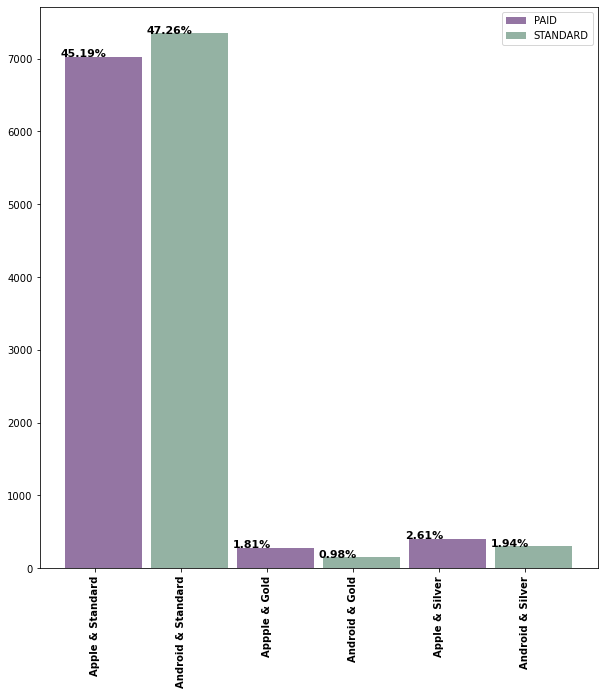

In [259]:
# Create bars
barWidth = 0.9
bars1 = [apple_and_standard, apple_and_gold, apple_and_silver]
bars2 = [android_and_standard, android_and_gold, android_and_silver]
bars3 = bars1 + bars2
 
# The X position of bars
r1 = [1,3,5]
r2 = [2,4,6]
r3 = r1 + r2

# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='PAID')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='STANDARD')

# Create legend
plt.legend()

# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(len(r3))], ['Apple & Standard','Android & Standard' , 'Appple & Gold' , 'Android & Gold','Apple & Silver', 'Android & Silver'], rotation=90,fontweight='bold')
 
# Create labels
label =  ['45.19%', '1.81%', '2.61%', '47.26%', '0.98%', '1.94%']

# Text on the top of each barplot
for i in range(len(r3)):
  plt.text(x = r3[i]-0.5 , y = bars3[i]+0.1, s = label[i], size = 11, fontweight='bold')
 
# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)

### Encoding categorical variables to numerical

In [260]:
df1.plan = df1.plan.replace({'STANDARD':1,'SILVER':0,'GOLD':0})
del df1['age']
del df1['city']

In [261]:
df1 = pd.get_dummies(df1, columns=['country', 'brand','age_categories', 'month_us','day_us', 'year_us'])

In [262]:
df1

,user_id,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,country_CE,country_EE,country_NE,country_Other,...,age_categories_old,month_us_Q1,month_us_Q2,month_us_Q3,month_us_Q4,day_us_1,day_us_2,day_us_3,year_us_2018,year_us_2019
0,user_0,0,1,1.0,1.0,3,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,user_1,1,1,0.0,0.0,75,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,user_2,0,1,0.0,0.0,71,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
3,user_3,0,1,0.0,0.0,219,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
4,user_4,0,1,0.0,0.0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,0,1,1.0,1.0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
15540,user_15540,0,1,0.0,0.0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
15541,user_15541,0,1,1.0,1.0,16,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
15542,user_15542,0,0,1.0,1.0,44,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [263]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15544 entries, 0 to 15543
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   user_id                                   15544 non-null  object 
 1   user_settings_crypto_unlocked             15544 non-null  int64  
 2   plan                                      15544 non-null  int64  
 3   attributes_notifications_marketing_push   15544 non-null  float64
 4   attributes_notifications_marketing_email  15544 non-null  float64
 5   num_contacts                              15544 non-null  int64  
 6   country_CE                                15544 non-null  uint8  
 7   country_EE                                15544 non-null  uint8  
 8   country_NE                                15544 non-null  uint8  
 9   country_Other                             15544 non-null  uint8  
 10  country_SE                        

## Exploratory Data Analysis on "notifications" dataset

In [264]:
df3

,reason,channel,status,user_id,created_date
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-12-02 17:58:33.320645
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_12783,2018-12-01 23:09:37.367127
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_10244,2018-12-04 02:57:56.425660
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_14486,2018-12-14 17:09:58.900808
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_28,2018-12-11 12:42:59.718574
...,...,...,...,...,...
97699,LOST_CARD_ORDER,EMAIL,FAILED,user_7488,2019-05-05 11:29:47.645713
97700,LOST_CARD_ORDER,EMAIL,SENT,user_7108,2019-05-06 08:17:29.915656
97701,LOST_CARD_ORDER,EMAIL,FAILED,user_5079,2019-05-06 13:35:51.055711
97702,LOST_CARD_ORDER,EMAIL,SENT,user_4860,2019-05-10 01:25:42.530159


In [265]:
print(df3.shape)

(97704, 5)


In [266]:
df3['status'].value_counts()

SENT      71693
FAILED    26011
Name: status, dtype: int64

In [267]:
df3['reason'].value_counts()

REENGAGEMENT_ACTIVE_FUNDS            28832
PROMO                                18987
NO_INITIAL_CARD_ORDER                 9071
NO_INITIAL_CARD_USE                   9035
INVEST_IN_GOLD                        6649
LOST_CARD_ORDER                       4941
PROMO_CARD_ORDER                      4358
JOINING_ANNIVERSARY                   3334
MADE_MONEY_REQUEST_NOT_SPLIT_BILL     2851
ONBOARDING_TIPS_ACTIVATED_USERS       2423
ENGAGEMENT_SPLIT_BILL_RESTAURANT      1834
BLACK_FRIDAY                          1681
METAL_RESERVE_PLAN                     950
SILVER_ENGAGEMENT_INACTIVE_CARD        896
WELCOME_BACK                           779
BLUE_TUESDAY                           555
SILVER_ENGAGEMENT_FEES_SAVED           528
Name: reason, dtype: int64

In [268]:
df3['channel'].value_counts()

EMAIL    49149
PUSH     46244
SMS       2311
Name: channel, dtype: int64

In [269]:
df3.describe() ##no NaN

,reason,channel,status,user_id,created_date
count,97704,97704,97704,97704,97704
unique,17,3,2,15156,97701
top,REENGAGEMENT_ACTIVE_FUNDS,EMAIL,SENT,user_10272,2018-03-15 08:34:34.761530
freq,28832,49149,71693,289,2


In [270]:
duplicated_rows = df3[df3.duplicated()]
print(duplicated_rows)                          ####no duplicated rows

Empty DataFrame
Columns: [reason, channel, status, user_id, created_date]
Index: []


### Feature engineering

In [271]:
df3.reason = df3.reason.replace({'BLUE_TUESDAY':'PROMO','BLACK_FRIDAY':'PROMO','JOINING_ANNIVERSARY':'PROMO',
                                 'PROMO_CARD_ORDER':'PROMO'
                                })
df3.reason = df3.reason.replace({'SILVER_ENGAGEMENT_INACTIVE_CARD':'REENGAGEMENT_ACTIVE_FUNDS',
                                 'ENGAGEMENT_SPLIT_BILL_RESTAURANT':'REENGAGEMENT_ACTIVE_FUNDS'
                                })
df3.reason = df3.reason.replace({'NO_INITIAL_CARD_USE':'NO_INITIAL_CARD_ORDER'})
df3.reason = df3.reason.replace({'WELCOME_BACK':'ONBOARDING_TIPS_ACTIVATED_USERS'})
df3.reason = df3.reason.replace({'METAL_RESERVE_PLAN':'INVEST_IN_GOLD',
                                 'SILVER_ENGAGEMENT_FEES_SAVED':'INVEST_IN_GOLD'
                                })

year_not = []
month_not = []
day_not = []
for i in df3['created_date']:
    year_not.append(int(i[:4]))
    month_not.append(int(i[5:7]))
    day_not.append(int(i[8:10]))
df3['year_not'] = year_not
df3['month_not'] = month_not
df3['day_not'] = day_not
del df3['created_date']

df3.month_not = df3.month_not.replace({1:'Q1', 2:'Q1', 3:'Q1',4:'Q2', 5:'Q2', 6:'Q2',
                                      7:'Q3', 8:'Q3', 9:'Q3',10:'Q4', 11:'Q4', 12:'Q4'
                                      })
df3.day_not = pd.cut(df3.day_not, 3, labels=[1, 2, 3])

## Visualizations

#### Barplot: how many users transacted for each of 7 reasons

No handles with labels found to put in legend.


[31562, 28915, 18106, 8127, 3202, 2851, 4941]
[1.0, 0.9078053707638187, 0.5313294556093483, 0.18376232106161403, 0.012225279509595625, 0.0, 0.07279439935913065]


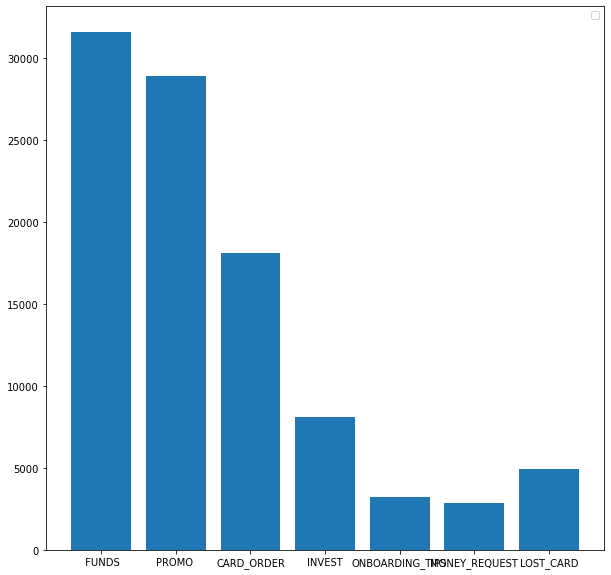

In [272]:
c = [df3.user_id[df3.reason ==  'REENGAGEMENT_ACTIVE_FUNDS'].count(), df3.user_id[df3.reason == 'PROMO'].count(),
     df3.user_id[df3.reason == 'NO_INITIAL_CARD_ORDER'].count(), df3.user_id[df3.reason == 'INVEST_IN_GOLD'].count(), 
     df3.user_id[df3.reason == 'ONBOARDING_TIPS_ACTIVATED_USERS'].count(), df3.user_id[df3.reason == 'MADE_MONEY_REQUEST_NOT_SPLIT_BILL'].count(), 
     df3.user_id[df3.reason == 'LOST_CARD_ORDER'].count()]

print(c)
max = np.max(c)
min = np.min(c)

v=[]
for i in c:
  i = (i-min) / (max-min)
  v.append(i)
print(v)

xplot = [' FUNDS','PROMO ','CARD_ORDER','INVEST','ONBOARDING_TIPS','MONEY_REQUEST','LOST_CARD']
yplot=c

plt.bar(xplot,yplot, )
plt.rcParams['figure.figsize'] = (10,10)
plt.legend()

#### Barplot: Notifications by Channel

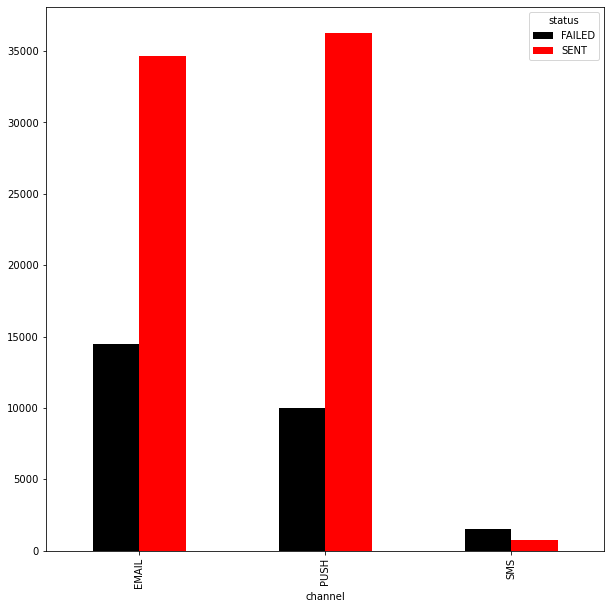

In [273]:
df3.groupby(['channel', 'status']).size().unstack().plot.bar(color='kr')

### Count each Reason per user

In [274]:
not1 = df3.groupby('user_id')['reason'].value_counts().unstack().fillna(0)
not1

reason,INVEST_IN_GOLD,LOST_CARD_ORDER,MADE_MONEY_REQUEST_NOT_SPLIT_BILL,NO_INITIAL_CARD_ORDER,ONBOARDING_TIPS_ACTIVATED_USERS,PROMO,REENGAGEMENT_ACTIVE_FUNDS
user_id,,,,,,,
user_0,1.0,0.0,0.0,1.0,4.0,1.0,1.0
user_1,1.0,0.0,0.0,8.0,0.0,2.0,4.0
user_10,1.0,1.0,0.0,3.0,0.0,3.0,0.0
user_100,1.0,1.0,0.0,1.0,0.0,1.0,1.0
user_1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
user_9995,0.0,0.0,0.0,1.0,0.0,1.0,0.0
user_9996,0.0,0.0,0.0,1.0,0.0,1.0,1.0
user_9997,0.0,0.0,0.0,0.0,0.0,2.0,6.0


### Count each channel per user

In [275]:
not2 = df3.groupby('user_id')['channel'].value_counts().unstack().fillna(0)
not2 

channel,EMAIL,PUSH,SMS
user_id,,,
user_0,6.0,2.0,0.0
user_1,10.0,5.0,0.0
user_10,5.0,3.0,0.0
user_100,2.0,3.0,0.0
user_1000,1.0,0.0,0.0
...,...,...,...
user_9995,2.0,0.0,0.0
user_9996,1.0,2.0,0.0
user_9997,2.0,5.0,1.0


### Count each Status per user

In [276]:
not3 = df3.groupby('user_id')['status'].value_counts().unstack().fillna(0)
not3

status,FAILED,SENT
user_id,,
user_0,0.0,8.0
user_1,5.0,10.0
user_10,0.0,8.0
user_100,0.0,5.0
user_1000,0.0,1.0
...,...,...
user_9995,1.0,1.0
user_9996,2.0,1.0
user_9997,1.0,7.0


### Count each year_not occurencies per user

In [277]:
not4 = df3.groupby('user_id')['year_not'].value_counts().unstack().fillna(0)
not4

year_not,2018,2019
user_id,,
user_0,7.0,1.0
user_1,12.0,3.0
user_10,4.0,4.0
user_100,3.0,2.0
user_1000,1.0,0.0
...,...,...
user_9995,1.0,1.0
user_9996,2.0,1.0
user_9997,4.0,4.0


### Count each month_not per user

In [278]:
not5 = df3.groupby('user_id')['month_not'].value_counts().unstack().fillna(0)
not5

month_not,Q1,Q2,Q3,Q4
user_id,,,,
user_0,1.0,0.0,3.0,4.0
user_1,11.0,0.0,1.0,3.0
user_10,7.0,0.0,0.0,1.0
user_100,2.0,0.0,0.0,3.0
user_1000,1.0,0.0,0.0,0.0
...,...,...,...,...
user_9995,1.0,1.0,0.0,0.0
user_9996,1.0,0.0,0.0,2.0
user_9997,4.0,0.0,2.0,2.0


### Count day_not occurencies per user

In [279]:
not6 = df3.groupby('user_id')['day_not'].value_counts().unstack().fillna(0)
not6

day_not,1,2,3
user_id,,,
user_0,3.0,2.0,3.0
user_1,4.0,6.0,5.0
user_10,3.0,4.0,1.0
user_100,1.0,3.0,1.0
user_1000,0.0,0.0,1.0
...,...,...,...
user_9995,2.0,0.0,0.0
user_9996,0.0,1.0,2.0
user_9997,1.0,6.0,1.0


### We merge all of these tables including info for the notifications of the users

In [280]:
not_final1 = pd.concat([not1, not2], axis=1)
not_final2 = pd.concat([not3, not_final1], axis=1)
not_final3 = pd.concat([not4, not_final2], axis=1)
not_final4 = pd.concat([not5, not_final3], axis=1)
not_final5 = pd.concat([not6, not_final4], axis=1)
not_final5

,1,2,3,Q1,Q2,Q3,Q4,2018,2019,FAILED,...,INVEST_IN_GOLD,LOST_CARD_ORDER,MADE_MONEY_REQUEST_NOT_SPLIT_BILL,NO_INITIAL_CARD_ORDER,ONBOARDING_TIPS_ACTIVATED_USERS,PROMO,REENGAGEMENT_ACTIVE_FUNDS,EMAIL,PUSH,SMS
user_id,,,,,,,,,,,,,,,,,,,,,
user_0,3.0,2.0,3.0,1.0,0.0,3.0,4.0,7.0,1.0,0.0,...,1.0,0.0,0.0,1.0,4.0,1.0,1.0,6.0,2.0,0.0
user_1,4.0,6.0,5.0,11.0,0.0,1.0,3.0,12.0,3.0,5.0,...,1.0,0.0,0.0,8.0,0.0,2.0,4.0,10.0,5.0,0.0
user_10,3.0,4.0,1.0,7.0,0.0,0.0,1.0,4.0,4.0,0.0,...,1.0,1.0,0.0,3.0,0.0,3.0,0.0,5.0,3.0,0.0
user_100,1.0,3.0,1.0,2.0,0.0,0.0,3.0,3.0,2.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,3.0,0.0
user_1000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_9995,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
user_9996,0.0,1.0,2.0,1.0,0.0,0.0,2.0,2.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0
user_9997,1.0,6.0,1.0,4.0,0.0,2.0,2.0,4.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,6.0,2.0,5.0,1.0


In [281]:
not_final2.columns

Index(['FAILED', 'SENT', 'INVEST_IN_GOLD', 'LOST_CARD_ORDER',
       'MADE_MONEY_REQUEST_NOT_SPLIT_BILL', 'NO_INITIAL_CARD_ORDER',
       'ONBOARDING_TIPS_ACTIVATED_USERS', 'PROMO', 'REENGAGEMENT_ACTIVE_FUNDS',
       'EMAIL', 'PUSH', 'SMS'],
      dtype='object')


## Exploratory Data Analysis for the "transactions" dataset


In [282]:
print(combo.head(10))

  transaction_id transactions_type transactions_currency  amount_usd  \
0  transaction_0          TRANSFER                   AED        4.55   
1  transaction_1      CARD_PAYMENT                   AED       15.50   
2  transaction_2      CARD_PAYMENT                   AED       43.40   
3  transaction_3          TRANSFER                   AED    10043.01   
4  transaction_4      CARD_PAYMENT                   AED       43.81   
5  transaction_5      CARD_PAYMENT                   AED        2.07   
6  transaction_6      CARD_PAYMENT                   AED       10.44   
7  transaction_7      CARD_PAYMENT                   AED       20.83   
8  transaction_8      CARD_PAYMENT                   AED        1.76   
9  transaction_9      CARD_PAYMENT                   AED       11.57   

  transactions_state ea_cardholderpresence  ea_merchant_mcc ea_merchant_city  \
0          COMPLETED                   NaN              NaN              NaN   
1          COMPLETED                 FALSE     

In [283]:
combo.describe()

,amount_usd,ea_merchant_mcc
count,2.181026e+06,1.257051e+06
mean,1.189225e+05,5.703386e+03
std,6.955454e+07,9.480411e+02
min,0.000000e+00,7.420000e+02
25%,2.030000e+00,5.411000e+03
50%,8.510000e+00,5.812000e+03
75%,2.807000e+01,5.921000e+03
max,7.464155e+10,9.406000e+03


In [284]:
combo['user_id'].value_counts()

user_10883    3381
user_2034     2894
user_8883     2762
user_14986    2749
user_4681     2687
              ... 
user_5955        1
user_7551        1
user_13893       1
user_12357       1
user_1684        1
Name: user_id, Length: 15012, dtype: int64

In [285]:
combo['transactions_type'].value_counts()

CARD_PAYMENT    1173661
TRANSFER         402126
TOPUP            309740
EXCHANGE         124800
ATM               74181
CASHBACK          65063
FEE               18786
CARD_REFUND        9209
TAX                2267
REFUND             1193
Name: transactions_type, dtype: int64

In [286]:
combo['transactions_state'].value_counts()

COMPLETED    1916387
DECLINED      124226
REVERTED       89330
FAILED         32566
PENDING        17153
CANCELLED       1364
Name: transactions_state, dtype: int64

In [287]:
combo['transactions_currency'].value_counts()

EUR    931327
GBP    702488
PLN    185800
RON    134098
USD     62331
CZK     35968
CHF     31291
SEK     17804
AUD     13161
NOK     12749
DKK     11362
HUF      6231
CAD      6036
TRY      3629
BTC      3014
ILS      2941
NZD      2795
JPY      2590
AED      2590
ZAR      2413
XRP      2101
SGD      2014
THB      1796
HKD      1381
ETH       859
MAD       645
LTC       497
BCH       284
BGN       219
HRK       187
QAR       180
MXN       108
INR       100
RUB        26
SAR        11
Name: transactions_currency, dtype: int64

In [288]:
combo['amount_usd'].value_counts()

0.00       46490
0.85       38939
0.01       36561
8.51       36536
10.00      29336
           ...  
334.11         1
443.88         1
440.12         1
202.05         1
2274.84        1
Name: amount_usd, Length: 43465, dtype: int64

In [289]:
combo['ea_cardholderpresence'].value_counts()

FALSE      1012235
TRUE        231311
UNKNOWN       4274
Name: ea_cardholderpresence, dtype: int64

In [290]:
combo['ea_merchant_city'].value_counts()

London           73463
Bucuresti        26683
Vilnius          24849
Dublin           19966
35314369001      18181
                 ...  
Abington Bigg        1
525528031175         1
Balotesi             1
Sunbyberg            1
Greenside Pl         1
Name: ea_merchant_city, Length: 55473, dtype: int64

In [291]:
combo['ea_merchant_country'].value_counts()

GBR    362904
IRL     99469
FRA     80269
USA     78546
POL     68411
        ...  
TGO         1
SGB         1
PCN         1
LSO         1
GNQ         1
Name: ea_merchant_country, Length: 196, dtype: int64

In [292]:
combo['ea_merchant_mcc'].value_counts()

5812.0    183354
5411.0    177865
5814.0     78975
6011.0     74278
4121.0     53257
           ...  
3261.0         1
1476.0         1
3220.0         1
3190.0         1
1434.0         1
Name: ea_merchant_mcc, Length: 635, dtype: int64

In [293]:
combo['direction'].value_counts()

OUTBOUND    1759079
INBOUND      421947
Name: direction, dtype: int64

In [294]:
combo['created_date'].value_counts()

2018-12-22 07:24:30.960017    3
2018-10-25 10:06:43.624650    3
2018-12-13 14:49:24.314528    3
2019-05-09 08:48:56.864973    3
2018-12-02 23:38:38.686727    2
                             ..
2019-03-23 12:50:40.935765    1
2018-12-07 00:41:49.855753    1
2018-03-21 01:59:14.970147    1
2019-01-27 02:58:28.038984    1
2019-03-07 04:52:27.596060    1
Name: created_date, Length: 2180706, dtype: int64

In [295]:
combo.isna().sum()

transaction_id                0
transactions_type             0
transactions_currency         0
amount_usd                    0
transactions_state            0
ea_cardholderpresence    933206
ea_merchant_mcc          923975
ea_merchant_city         924080
ea_merchant_country      924239
direction                     0
user_id                       0
created_date                  0
dtype: int64

### Feature Engineering

In [296]:
combo.transactions_type = combo.transactions_type.replace('REFUND','CARD_REFUND')
combo.transactions_state = combo.transactions_state.replace('CANCELLED','FAILED')
combo['ea_cardholderpresence'].fillna('UNKNOWN', inplace = True)

#currency codification
combo.transactions_currency = combo.transactions_currency.replace({'SAR':'Other_Cur','RUB':'Other_Cur','INR':'Other_Cur',
                                                                   'MXN':'Other_Cur','QAR':'Other_Cur','HRK':'Other_Cur',
                                                                   'BGN':'Other_Cur','BCH':'Other_Cur','LTC':'Other_Cur',
                                                                   'MAD':'Other_Cur','ETH':'Other_Cur','HKD':'Other_Cur',
                                                                   'THB':'Other_Cur','SGD':'Other_Cur','XRP':'Other_Cur',
                                                                   'ZAR':'Other_Cur','JPY':'Other_Cur','CAD':'Other_Cur',
                                                                   'DKK':'Other_Cur','NOK':'Other_Cur','AUD':'Other_Cur',
                                                                   'SEK':'Other_Cur','CHF':'Together','CZK':'Together','USD':'Together'
                                                                   })

year_trans = []
month_trans = []
day_trans = []
for i in combo['created_date']:
    year_trans.append(int(i[:4]))
    month_trans.append(int(i[5:7]))
    day_trans.append(int(i[8:10]))
combo['year_trans'] = year_trans
combo['month_trans'] = month_trans
combo['day_trans'] = day_trans
#del combo['created_date']

combo.month_trans = combo.month_trans.replace({1:'Q1', 2:'Q1', 3:'Q1',4:'Q2', 5:'Q2', 6:'Q2',
                                      7:'Q3', 8:'Q3', 9:'Q3',10:'Q4', 11:'Q4', 12:'Q4'
                                      })
combo.day_trans = pd.cut(combo.day_trans, 3, labels=[1, 2, 3])

combo['ea_merchant_country'].fillna('Other_Country', inplace = True)
combo['freq_ea_merchant_country'] = combo.groupby('ea_merchant_country')['user_id'].transform('count')
combo['freq_ea_merchant_country'] = combo['freq_ea_merchant_country'] / len(combo['freq_ea_merchant_country'])



In [297]:
combo['freq_ea_merchant_country'].value_counts()

4.237634e-01    924239
1.663914e-01    362904
4.560652e-02     99469
3.680332e-02     80269
3.601333e-02     78546
                 ...  
4.584998e-06        10
4.584998e-07         8
3.209499e-06         7
9.169996e-07         6
2.750999e-06         6
Name: freq_ea_merchant_country, Length: 155, dtype: int64

In [298]:
combo['freq_ea_merchant_country'] = pd.cut(combo['freq_ea_merchant_country'], 5, labels=['0','1','2','3','4'])

combo['ea_merchant_mcc'] = combo['ea_merchant_mcc'].fillna(combo['ea_merchant_mcc'].median())

### Inspect the frequencies of the "freq_ea_merchant_city" variable and remove it because of really low percentages

In [299]:
combo['freq_ea_merchant_city'] = combo.groupby('ea_merchant_city')['transaction_id'].transform('count')
combo['freq_ea_merchant_city'] = combo['freq_ea_merchant_city'] / len(combo['freq_ea_merchant_city'])
combo['freq_ea_merchant_city'].value_counts()

3.368277e-02    73463
1.223415e-02    26683
1.139326e-02    24849
4.584998e-07    23634
9.154407e-03    19966
                ...  
9.628496e-05      210
9.353396e-05      204
8.940746e-05      195
8.894896e-05      194
8.436396e-05      184
Name: freq_ea_merchant_city, Length: 660, dtype: int64

In [300]:
del combo['ea_merchant_city']

In [301]:
del combo['created_date']

In [302]:
combo.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_country,direction,user_id,year_trans,month_trans,day_trans,freq_ea_merchant_country,freq_ea_merchant_city
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,UNKNOWN,5812.0,Other_Country,OUTBOUND,user_4368,2018,Q2,1,4,NaN
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,ARE,OUTBOUND,user_2355,2019,Q1,2,0,0.001943
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,ARE,OUTBOUND,user_2355,2019,Q1,2,0,0.001943
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,UNKNOWN,5812.0,Other_Country,OUTBOUND,user_2355,2019,Q1,3,4,NaN
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,ARE,OUTBOUND,user_14318,2019,Q1,3,0,0.000203


In [303]:
combo['year_trans'].value_counts()

2018    1115091
2019    1065935
Name: year_trans, dtype: int64

In [304]:
combo['month_trans'].value_counts()

Q1    759813
Q4    550445
Q2    515316
Q3    355452
Name: month_trans, dtype: int64

In [305]:
combo['day_trans'].value_counts()

1    831138
2    686441
3    663447
Name: day_trans, dtype: int64

In [306]:
combo.isna().sum()

transaction_id                   0
transactions_type                0
transactions_currency            0
amount_usd                       0
transactions_state               0
ea_cardholderpresence            0
ea_merchant_mcc                  0
ea_merchant_country              0
direction                        0
user_id                          0
year_trans                       0
month_trans                      0
day_trans                        0
freq_ea_merchant_country         0
freq_ea_merchant_city       924080
dtype: int64

In [307]:
del combo['freq_ea_merchant_country']

## Visualizations

#### Transactions by Trimester

Text(0.5, 0, 'TRIMESTERS')

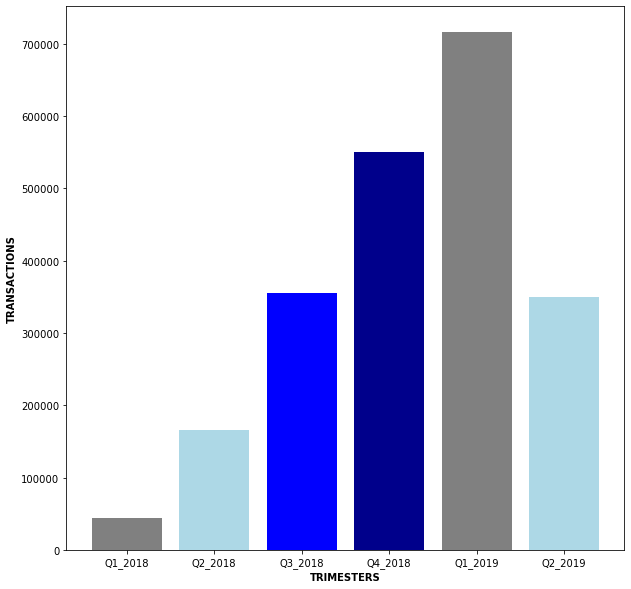

In [308]:
trans_in_2018_in_first = combo.transaction_id[(combo.year_trans == 2018) &(combo.month_trans == 'Q1')].count()
trans_in_2018_in_second = combo.transaction_id[(combo.year_trans == 2018) &(combo.month_trans == 'Q2')].count()
trans_in_2018_in_third = combo.transaction_id[(combo.year_trans == 2018) &(combo.month_trans == 'Q3')].count()
trans_in_2018_in_forth = combo.transaction_id[(combo.year_trans == 2018) &(combo.month_trans == 'Q4')].count()

trans_in_2019_in_first = combo.transaction_id[(combo.year_trans == 2019) &(combo.month_trans == 'Q1')].count()
trans_in_2019_in_second = combo.transaction_id[(combo.year_trans == 2019) &(combo.month_trans == 'Q2')].count()
trans_in_2019_in_third = combo.transaction_id[(combo.year_trans == 2019) &(combo.month_trans == 'Q3')].count()
trans_in_2019_in_forth = combo.transaction_id[(combo.year_trans == 2019) &(combo.month_trans == 'Q4')].count()

xline = ['Q1_2018','Q2_2018','Q3_2018','Q4_2018','Q1_2019','Q2_2019']
y=[trans_in_2018_in_first, trans_in_2018_in_second, trans_in_2018_in_third, trans_in_2018_in_forth, trans_in_2019_in_first,trans_in_2019_in_second ]

colors = ['grey','lightblue','blue', 'darkblue','grey', 'lightblue']
plt.bar(xline, y, color=colors, linewidth=2, label= 'in 2018')
plt.rcParams['figure.figsize']=(22,12)

plt.ylabel('TRANSACTIONS', fontweight='bold')
plt.xlabel('TRIMESTERS',fontweight='bold')

## Now we will create a new table containing info for the transactions of the users 

### Count types for each different user

In [309]:
new1 = combo.groupby('user_id')['transactions_type'].value_counts().unstack().fillna(0)
new1

transactions_type,ATM,CARD_PAYMENT,CARD_REFUND,CASHBACK,EXCHANGE,FEE,TAX,TOPUP,TRANSFER
user_id,,,,,,,,,
user_0,0.0,343.0,1.0,0.0,5.0,0.0,0.0,173.0,23.0
user_1,5.0,86.0,0.0,0.0,0.0,0.0,0.0,27.0,28.0
user_10,3.0,61.0,9.0,0.0,3.0,0.0,0.0,44.0,23.0
user_100,6.0,43.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0
user_1000,1.0,20.0,0.0,16.0,0.0,2.0,0.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...
user_9995,0.0,4.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
user_9996,1.0,25.0,0.0,0.0,5.0,1.0,0.0,5.0,0.0
user_9997,5.0,54.0,1.0,0.0,20.0,1.0,0.0,41.0,24.0


### Count state for each different user

In [310]:
new2 = combo.groupby('user_id')['transactions_state'].value_counts().unstack().fillna(0)
new2

transactions_state,COMPLETED,DECLINED,FAILED,PENDING,REVERTED
user_id,,,,,
user_0,520.0,6.0,9.0,2.0,8.0
user_1,133.0,6.0,1.0,0.0,6.0
user_10,123.0,16.0,0.0,1.0,3.0
user_100,55.0,4.0,4.0,0.0,3.0
user_1000,43.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...
user_9995,4.0,1.0,1.0,0.0,2.0
user_9996,31.0,5.0,0.0,0.0,1.0
user_9997,128.0,5.0,5.0,0.0,8.0


### Count currency of transaction for each different user

In [311]:
new3 = combo.groupby('user_id')['transactions_currency'].value_counts().unstack().fillna(0)
new3

transactions_currency,AED,BTC,EUR,GBP,HUF,ILS,NZD,Other_Cur,PLN,RON,TRY,Together
user_id,,,,,,,,,,,,
user_0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,501.0,0.0,0.0,0.0,0.0
user_1,0.0,0.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_10,0.0,1.0,142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_100,0.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
user_9995,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
user_9996,0.0,0.0,20.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_9997,0.0,0.0,25.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


### Count cardholderpresence occurencies for each different user

In [312]:
new4 = combo.groupby('user_id')['ea_cardholderpresence'].value_counts().unstack().fillna(0)
new4

ea_cardholderpresence,FALSE,TRUE,UNKNOWN
user_id,,,
user_0,342.0,1.0,202.0
user_1,83.0,8.0,55.0
user_10,28.0,36.0,79.0
user_100,49.0,0.0,17.0
user_1000,21.0,0.0,26.0
...,...,...,...
user_9995,0.0,4.0,4.0
user_9996,26.0,0.0,11.0
user_9997,55.0,4.0,87.0


### Count direction for each different user

In [313]:
new5 = combo.groupby('user_id')['direction'].value_counts().unstack().fillna(0)
new5


direction,INBOUND,OUTBOUND
user_id,,
user_0,178.0,367.0
user_1,30.0,116.0
user_10,53.0,90.0
user_100,17.0,49.0
user_1000,23.0,24.0
...,...,...
user_9995,3.0,5.0
user_9996,5.0,32.0
user_9997,44.0,102.0


### Count mean of amount_usd for each different user

In [314]:
new6 = np.round(combo.groupby('user_id')['amount_usd'].mean())
pd.set_option('display.max_rows',15)
new6 = new6.add_suffix('').reset_index()
new6.columns=new6.columns.map(lambda x : x+'_mean' if x !='user_id' else x)
new6

,user_id,amount_usd_mean
0,user_0,13.0
1,user_1,97.0
2,user_10,44.0
3,user_100,96.0
4,user_1000,19.0
...,...,...
15007,user_9995,41.0
15008,user_9996,46.0
15009,user_9997,103.0
15010,user_9998,18.0


In [315]:
new6 = new6.set_index('user_id')
new6

,amount_usd_mean
user_id,
user_0,13.0
user_1,97.0
user_10,44.0
user_100,96.0
user_1000,19.0
...,...
user_9995,41.0
user_9996,46.0
user_9997,103.0


### Count max of amount_usd for each different user

In [316]:
new7 = combo.groupby('user_id')['amount_usd'].max()
new7 = new7.add_suffix('').reset_index()
new7.columns=new7.columns.map(lambda x : x+'_max' if x !='user_id' else x)
new7 = new7.set_index('user_id')
new7

,amount_usd_max
user_id,
user_0,510.64
user_1,851.06
user_10,255.22
user_100,425.53
user_1000,238.31
...,...
user_9995,83.51
user_9996,500.00
user_9997,2000.00


### Count mean of merchant_mcc for each different user

In [317]:
new8 = combo.groupby('user_id')['ea_merchant_mcc'].mean()
new8 = new8.add_suffix('').reset_index()
new8.columns=new8.columns.map(lambda x : x+'_mean' if x !='user_id' else x)
new8 = new8.set_index('user_id')
new8

,ea_merchant_mcc_mean
user_id,
user_0,5558.016514
user_1,5810.006849
user_10,5704.636364
user_100,5766.863636
user_1000,5775.978723
...,...
user_9995,5905.500000
user_9996,5672.054054
user_9997,5757.760274


### Count max of merchant_mcc for each different user

In [318]:
new9 = combo.groupby('user_id')['ea_merchant_mcc'].max()
new9 = new9.add_suffix('').reset_index()
new9.columns=new9.columns.map(lambda x : x+'_max' if x !='user_id' else x)
new9 = new9.set_index('user_id')
new9

,ea_merchant_mcc_max
user_id,
user_0,7523.0
user_1,9399.0
user_10,7311.0
user_100,7512.0
user_1000,7523.0
...,...
user_9995,5999.0
user_9996,7011.0
user_9997,7512.0


### Add the total transactions of each different user

In [319]:
count_trans = new5.sum(axis=1)
new5['count_trans'] = count_trans
new5

direction,INBOUND,OUTBOUND,count_trans
user_id,,,
user_0,178.0,367.0,545.0
user_1,30.0,116.0,146.0
user_10,53.0,90.0,143.0
user_100,17.0,49.0,66.0
user_1000,23.0,24.0,47.0
...,...,...,...
user_9995,3.0,5.0,8.0
user_9996,5.0,32.0,37.0
user_9997,44.0,102.0,146.0


### Count year_trans occurencies for each different user

In [320]:
new10 = combo.groupby('user_id')['year_trans'].value_counts().unstack().fillna(0)
new10

year_trans,2018,2019
user_id,,
user_0,375.0,170.0
user_1,55.0,91.0
user_10,100.0,43.0
user_100,16.0,50.0
user_1000,0.0,47.0
...,...,...
user_9995,4.0,4.0
user_9996,28.0,9.0
user_9997,80.0,66.0


### Count month_trans occurencies for each different user

In [321]:
new11 = combo.groupby('user_id')['month_trans'].value_counts().unstack().fillna(0)
new11

month_trans,Q1,Q2,Q3,Q4
user_id,,,,
user_0,78.0,92.0,29.0,346.0
user_1,66.0,39.0,12.0,29.0
user_10,18.0,30.0,28.0,67.0
user_100,50.0,0.0,0.0,16.0
user_1000,9.0,38.0,0.0,0.0
...,...,...,...,...
user_9995,0.0,8.0,0.0,0.0
user_9996,9.0,0.0,0.0,28.0
user_9997,28.0,38.0,52.0,28.0


### Count day_trans occurencies for each different user

In [322]:
new12 = combo.groupby('user_id')['day_trans'].value_counts().unstack().fillna(0)
new12

day_trans,1,2,3
user_id,,,
user_0,195.0,172.0,178.0
user_1,50.0,52.0,44.0
user_10,53.0,45.0,45.0
user_100,29.0,19.0,18.0
user_1000,5.0,28.0,14.0
...,...,...,...
user_9995,1.0,4.0,3.0
user_9996,9.0,4.0,24.0
user_9997,61.0,61.0,24.0


### Create final table containing all the info of the transactions table

In [323]:
new_final1 = pd.concat([new1, new2], axis=1)
new_final2 = pd.concat([new3, new_final1], axis=1)
new_final3 = pd.concat([new4, new_final2], axis=1)
new_final4 = pd.concat([new5, new_final3], axis=1)
new_final5 = pd.concat([new6, new_final4], axis=1)
new_final6 = pd.concat([new7, new_final5], axis=1)
new_final7 = pd.concat([new8, new_final6], axis=1)
new_final8 = pd.concat([new9, new_final7], axis=1)
new_final9 = pd.concat([new10, new_final8], axis=1)
new_final10 = pd.concat([new11, new_final9], axis=1)
new_final11 = pd.concat([new12, new_final10], axis=1)
new_final11

,1,2,3,Q1,Q2,Q3,Q4,2018,2019,ea_merchant_mcc_max,...,EXCHANGE,FEE,TAX,TOPUP,TRANSFER,COMPLETED,DECLINED,FAILED,PENDING,REVERTED
user_id,,,,,,,,,,,,,,,,,,,,,
user_0,195.0,172.0,178.0,78.0,92.0,29.0,346.0,375.0,170.0,7523.0,...,5.0,0.0,0.0,173.0,23.0,520.0,6.0,9.0,2.0,8.0
user_1,50.0,52.0,44.0,66.0,39.0,12.0,29.0,55.0,91.0,9399.0,...,0.0,0.0,0.0,27.0,28.0,133.0,6.0,1.0,0.0,6.0
user_10,53.0,45.0,45.0,18.0,30.0,28.0,67.0,100.0,43.0,7311.0,...,3.0,0.0,0.0,44.0,23.0,123.0,16.0,0.0,1.0,3.0
user_100,29.0,19.0,18.0,50.0,0.0,0.0,16.0,16.0,50.0,7512.0,...,0.0,0.0,0.0,17.0,0.0,55.0,4.0,4.0,0.0,3.0
user_1000,5.0,28.0,14.0,9.0,38.0,0.0,0.0,0.0,47.0,7523.0,...,0.0,2.0,0.0,7.0,1.0,43.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_9995,1.0,4.0,3.0,0.0,8.0,0.0,0.0,4.0,4.0,5999.0,...,1.0,0.0,0.0,3.0,0.0,4.0,1.0,1.0,0.0,2.0
user_9996,9.0,4.0,24.0,9.0,0.0,0.0,28.0,28.0,9.0,7011.0,...,5.0,1.0,0.0,5.0,0.0,31.0,5.0,0.0,0.0,1.0
user_9997,61.0,61.0,24.0,28.0,38.0,52.0,28.0,80.0,66.0,7512.0,...,20.0,1.0,0.0,41.0,24.0,128.0,5.0,5.0,0.0,8.0


In [324]:
new_final11.columns

Index([                     1,                      2,                      3,
                         'Q1',                   'Q2',                   'Q3',
                         'Q4',                   2018,                   2019,
        'ea_merchant_mcc_max', 'ea_merchant_mcc_mean',       'amount_usd_max',
            'amount_usd_mean',              'INBOUND',             'OUTBOUND',
                'count_trans',                'FALSE',                 'TRUE',
                    'UNKNOWN',                  'AED',                  'BTC',
                        'EUR',                  'GBP',                  'HUF',
                        'ILS',                  'NZD',            'Other_Cur',
                        'PLN',                  'RON',                  'TRY',
                   'Together',                  'ATM',         'CARD_PAYMENT',
                'CARD_REFUND',             'CASHBACK',             'EXCHANGE',
                        'FEE',                  'TAX

### Rename the columns because of conflict

In [325]:
new_final11 = new_final11.rename(columns={2018: "2018_trans", 2019: "2019_trans"})
new_final11 = new_final11.rename(columns={1: "1_tran", 2: "2_trans", 3:"3_trans"})
new_final11 = new_final11.rename(columns={"Q1": "Q1_trans", "Q2": "Q2_trans", "Q3":"Q3_trans", "Q4":"Q4_trans"})

In [326]:
new_final11.columns

Index(['1_tran', '2_trans', '3_trans', 'Q1_trans', 'Q2_trans', 'Q3_trans',
       'Q4_trans', '2018_trans', '2019_trans', 'ea_merchant_mcc_max',
       'ea_merchant_mcc_mean', 'amount_usd_max', 'amount_usd_mean', 'INBOUND',
       'OUTBOUND', 'count_trans', 'FALSE', 'TRUE', 'UNKNOWN', 'AED', 'BTC',
       'EUR', 'GBP', 'HUF', 'ILS', 'NZD', 'Other_Cur', 'PLN', 'RON', 'TRY',
       'Together', 'ATM', 'CARD_PAYMENT', 'CARD_REFUND', 'CASHBACK',
       'EXCHANGE', 'FEE', 'TAX', 'TOPUP', 'TRANSFER', 'COMPLETED', 'DECLINED',
       'FAILED', 'PENDING', 'REVERTED'],
      dtype='object')

### Merge the 'users' table with the final table we created for notifications

In [327]:
df13 = df1.join(not_final5, on='user_id')
df13

,user_id,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,country_CE,country_EE,country_NE,country_Other,...,INVEST_IN_GOLD,LOST_CARD_ORDER,MADE_MONEY_REQUEST_NOT_SPLIT_BILL,NO_INITIAL_CARD_ORDER,ONBOARDING_TIPS_ACTIVATED_USERS,PROMO,REENGAGEMENT_ACTIVE_FUNDS,EMAIL,PUSH,SMS
0,user_0,0,1,1.0,1.0,3,0,0,0,0,...,1.0,0.0,0.0,1.0,4.0,1.0,1.0,6.0,2.0,0.0
1,user_1,1,1,0.0,0.0,75,0,1,0,0,...,1.0,0.0,0.0,8.0,0.0,2.0,4.0,10.0,5.0,0.0
2,user_2,0,1,0.0,0.0,71,0,0,1,0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,3.0,0.0
3,user_3,0,1,0.0,0.0,219,0,0,1,0,...,0.0,0.0,0.0,5.0,0.0,1.0,5.0,5.0,6.0,0.0
4,user_4,0,1,0.0,0.0,0,0,0,1,0,...,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,0,1,1.0,1.0,0,0,1,0,0,...,1.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,2.0,0.0
15540,user_15540,0,1,0.0,0.0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0
15541,user_15541,0,1,1.0,1.0,16,0,0,1,0,...,0.0,0.0,2.0,1.0,0.0,1.0,1.0,4.0,1.0,0.0
15542,user_15542,0,0,1.0,1.0,44,0,0,1,0,...,0.0,0.0,0.0,7.0,0.0,0.0,1.0,7.0,1.0,0.0


In [328]:
df13.columns

Index([                                 'user_id',
                  'user_settings_crypto_unlocked',
                                           'plan',
        'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email',
                                   'num_contacts',
                                     'country_CE',
                                     'country_EE',
                                     'country_NE',
                                  'country_Other',
                                     'country_SE',
                                  'brand_Android',
                                    'brand_Apple',
                                  'brand_Unknown',
                           'age_categories_young',
                     'age_categories_middle aged',
                             'age_categories_old',
                                    'month_us_Q1',
                                    'month_us_Q2',
                               

### Rename some columns here because of conflict

In [329]:
df13 = df13.rename(columns={"SENT": "Status_SENT", "FAILED": "Status_Failed"})
df13 = df13.rename(columns={2018: "2018_not", 2019: "2019_not"})
df13 = df13.rename(columns={1: "1_not", 2: "2_not", 3:"3_not"})
df13 = df13.rename(columns={"Q1": "Q1_not", "Q2": "Q2_not", "Q3":"Q3_not", "Q4":"Q4_not"})

## Merge the final transactions table with the merged users-notifications table(df13)

In [330]:
df_final = df13.join(new_final11, on='user_id')
df_final

,user_id,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,country_CE,country_EE,country_NE,country_Other,...,EXCHANGE,FEE,TAX,TOPUP,TRANSFER,COMPLETED,DECLINED,FAILED,PENDING,REVERTED
0,user_0,0,1,1.0,1.0,3,0,0,0,0,...,5.0,0.0,0.0,173.0,23.0,520.0,6.0,9.0,2.0,8.0
1,user_1,1,1,0.0,0.0,75,0,1,0,0,...,0.0,0.0,0.0,27.0,28.0,133.0,6.0,1.0,0.0,6.0
2,user_2,0,1,0.0,0.0,71,0,0,1,0,...,0.0,0.0,0.0,41.0,135.0,268.0,10.0,2.0,0.0,2.0
3,user_3,0,1,0.0,0.0,219,0,0,1,0,...,0.0,0.0,0.0,14.0,7.0,140.0,9.0,0.0,5.0,4.0
4,user_4,0,1,0.0,0.0,0,0,0,1,0,...,4.0,0.0,0.0,12.0,0.0,50.0,1.0,2.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,0,1,1.0,1.0,0,0,1,0,0,...,13.0,1.0,0.0,43.0,1.0,91.0,22.0,10.0,3.0,8.0
15540,user_15540,0,1,0.0,0.0,0,0,1,0,0,...,0.0,1.0,0.0,5.0,1.0,10.0,4.0,0.0,0.0,2.0
15541,user_15541,0,1,1.0,1.0,16,0,0,1,0,...,5.0,1.0,0.0,90.0,446.0,1062.0,12.0,8.0,6.0,27.0
15542,user_15542,0,0,1.0,1.0,44,0,0,1,0,...,0.0,4.0,0.0,4.0,2.0,23.0,6.0,0.0,0.0,1.0


In [331]:
df_final.columns

Index(['user_id', 'user_settings_crypto_unlocked', 'plan',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'country_CE', 'country_EE', 'country_NE', 'country_Other', 'country_SE',
       'brand_Android', 'brand_Apple', 'brand_Unknown', 'age_categories_young',
       'age_categories_middle aged', 'age_categories_old', 'month_us_Q1',
       'month_us_Q2', 'month_us_Q3', 'month_us_Q4', 'day_us_1', 'day_us_2',
       'day_us_3', 'year_us_2018', 'year_us_2019', '1_not', '2_not', '3_not',
       'Q1_not', 'Q2_not', 'Q3_not', 'Q4_not', '2018_not', '2019_not',
       'Status_Failed', 'Status_SENT', 'INVEST_IN_GOLD', 'LOST_CARD_ORDER',
       'MADE_MONEY_REQUEST_NOT_SPLIT_BILL', 'NO_INITIAL_CARD_ORDER',
       'ONBOARDING_TIPS_ACTIVATED_USERS', 'PROMO', 'REENGAGEMENT_ACTIVE_FUNDS',
       'EMAIL', 'PUSH', 'SMS', '1_tran', '2_trans', '3_trans', 'Q1_trans',
       'Q2_trans', 'Q3_trans', 'Q4_trans', '2018_trans', '2019_tr

In [332]:
df_final.isna().sum()

user_id                                       0
user_settings_crypto_unlocked                 0
plan                                          0
attributes_notifications_marketing_push       0
attributes_notifications_marketing_email      0
                                           ... 
COMPLETED                                   532
DECLINED                                    532
FAILED                                      532
PENDING                                     532
REVERTED                                    532
Length: 92, dtype: int64

In [333]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15544 entries, 0 to 15543
Data columns (total 92 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   user_id                                   15544 non-null  object 
 1   user_settings_crypto_unlocked             15544 non-null  int64  
 2   plan                                      15544 non-null  int64  
 3   attributes_notifications_marketing_push   15544 non-null  float64
 4   attributes_notifications_marketing_email  15544 non-null  float64
 5   num_contacts                              15544 non-null  int64  
 6   country_CE                                15544 non-null  uint8  
 7   country_EE                                15544 non-null  uint8  
 8   country_NE                                15544 non-null  uint8  
 9   country_Other                             15544 non-null  uint8  
 10  country_SE                        

We save this dataframe, because it will be needed later

In [334]:
df_final.to_csv('FINAL.csv', encoding='utf-8', index=False)

### Drop the user_id column

In [335]:
df_final = df_final.loc[:, df_final.columns != 'user_id'].astype('float32')

### Replace missing values with zero, as these values correspond to users with no transactions, neither notifications data. 

In [336]:
df_final = df_final.fillna(0)

In [337]:
df_final.isna().sum()

user_settings_crypto_unlocked               0
plan                                        0
attributes_notifications_marketing_push     0
attributes_notifications_marketing_email    0
num_contacts                                0
                                           ..
COMPLETED                                   0
DECLINED                                    0
FAILED                                      0
PENDING                                     0
REVERTED                                    0
Length: 91, dtype: int64

In [338]:
df_final

,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,country_CE,country_EE,country_NE,country_Other,country_SE,...,EXCHANGE,FEE,TAX,TOPUP,TRANSFER,COMPLETED,DECLINED,FAILED,PENDING,REVERTED
0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,...,5.0,0.0,0.0,173.0,23.0,520.0,6.0,9.0,2.0,8.0
1,1.0,1.0,0.0,0.0,75.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,27.0,28.0,133.0,6.0,1.0,0.0,6.0
2,0.0,1.0,0.0,0.0,71.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,41.0,135.0,268.0,10.0,2.0,0.0,2.0
3,0.0,1.0,0.0,0.0,219.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,14.0,7.0,140.0,9.0,0.0,5.0,4.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4.0,0.0,0.0,12.0,0.0,50.0,1.0,2.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,13.0,1.0,0.0,43.0,1.0,91.0,22.0,10.0,3.0,8.0
15540,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,5.0,1.0,10.0,4.0,0.0,0.0,2.0
15541,0.0,1.0,1.0,1.0,16.0,0.0,0.0,1.0,0.0,0.0,...,5.0,1.0,0.0,90.0,446.0,1062.0,12.0,8.0,6.0,27.0
15542,0.0,0.0,1.0,1.0,44.0,0.0,0.0,1.0,0.0,0.0,...,0.0,4.0,0.0,4.0,2.0,23.0,6.0,0.0,0.0,1.0


In [339]:
df_final.columns

Index(['user_settings_crypto_unlocked', 'plan',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'country_CE', 'country_EE', 'country_NE', 'country_Other', 'country_SE',
       'brand_Android', 'brand_Apple', 'brand_Unknown', 'age_categories_young',
       'age_categories_middle aged', 'age_categories_old', 'month_us_Q1',
       'month_us_Q2', 'month_us_Q3', 'month_us_Q4', 'day_us_1', 'day_us_2',
       'day_us_3', 'year_us_2018', 'year_us_2019', '1_not', '2_not', '3_not',
       'Q1_not', 'Q2_not', 'Q3_not', 'Q4_not', '2018_not', '2019_not',
       'Status_Failed', 'Status_SENT', 'INVEST_IN_GOLD', 'LOST_CARD_ORDER',
       'MADE_MONEY_REQUEST_NOT_SPLIT_BILL', 'NO_INITIAL_CARD_ORDER',
       'ONBOARDING_TIPS_ACTIVATED_USERS', 'PROMO', 'REENGAGEMENT_ACTIVE_FUNDS',
       'EMAIL', 'PUSH', 'SMS', '1_tran', '2_trans', '3_trans', 'Q1_trans',
       'Q2_trans', 'Q3_trans', 'Q4_trans', '2018_trans', '2019_trans',
     

## Moving onto the THIRD Part - Classification

In [100]:
#We need to classify users based on their plan
y = df_final.plan.to_numpy()
y.shape

(15544,)

In [106]:
df_final = df_final.drop(columns=['plan'])

In [107]:
X = df_final.to_numpy()
X.shape

(15544, 90)

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import LocalOutlierFactor


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 1)
###We use the Local Outlier Factor algorithm in order to detect the outliers in multivariate data
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]



In [109]:
pipe = Pipeline([('scaler',StandardScaler()),('var',VarianceThreshold()),('sampler',SMOTE()),('clf',MLPClassifier())])
grid = {'var__threshold':[0,0.01]}
gs = GridSearchCV(pipe,grid, cv=5, scoring='f1_macro')
gs.fit(X_train,y_train)
print(gs.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('var', VarianceThreshold(threshold=0.01)),
                ('sampler', SMOTE()), ('clf', MLPClassifier())])


In [110]:
y_pred = gs.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74       353
         1.0       0.98      0.98      0.98      4311

    accuracy                           0.96      4664
   macro avg       0.86      0.86      0.86      4664
weighted avg       0.96      0.96      0.96      4664



In [111]:
pipe = Pipeline([('scaler',StandardScaler()),('var',VarianceThreshold()),('sampler',SMOTE()),('clf',KNeighborsClassifier())])
grid = {'var__threshold':[0,0.01]}
gs = GridSearchCV(pipe,grid, cv=5, scoring='f1_macro')
gs.fit(X_train,y_train)
gs.best_estimator_
y_pred = gs.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.67      0.33      0.44       710
         1.0       0.89      0.97      0.93      3954

    accuracy                           0.87      4664
   macro avg       0.78      0.65      0.68      4664
weighted avg       0.86      0.87      0.85      4664



In [112]:
pipe = Pipeline([('scaler',StandardScaler()),('var',VarianceThreshold()),('sampler',SMOTE()),('clf', DecisionTreeClassifier())])
grid = {'var__threshold':[0,0.01],'clf__max_depth':[None,5,10]}
gs = GridSearchCV(pipe,grid, cv=5, scoring='f1_macro')
gs.fit(X_train,y_train)
gs.best_estimator_
y_pred = gs.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.77      0.64      0.70       411
         1.0       0.97      0.98      0.97      4253

    accuracy                           0.95      4664
   macro avg       0.87      0.81      0.84      4664
weighted avg       0.95      0.95      0.95      4664



In [113]:
pipe = Pipeline([('scaler',StandardScaler()),('var',VarianceThreshold()),('sampler',SMOTE()),('clf',SVC())])
grid = {'var__threshold':[0,0.01]}
gs = GridSearchCV(pipe,grid, cv=5, scoring='f1_macro')
gs.fit(X_train,y_train)
gs.best_estimator_
y_pred = gs.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.67      0.61      0.64       377
         1.0       0.97      0.97      0.97      4287

    accuracy                           0.94      4664
   macro avg       0.82      0.79      0.80      4664
weighted avg       0.94      0.94      0.94      4664



In [115]:
pipe = Pipeline([('scaler',StandardScaler()),('var',VarianceThreshold()),('sampler',SMOTE()),('clf',RandomForestClassifier())])
grid = {'var__threshold':[0,0.01],'clf__max_depth':[None,5,10]}
gs = GridSearchCV(pipe,grid, cv=5, scoring='f1_macro')
gs.fit(X_train,y_train)
gs.best_estimator_
y_pred = gs.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.71      0.76       391
         1.0       0.97      0.98      0.98      4273

    accuracy                           0.96      4664
   macro avg       0.89      0.85      0.87      4664
weighted avg       0.96      0.96      0.96      4664



In [114]:
pipe = Pipeline([('scaler',StandardScaler()),('var',VarianceThreshold()),('sampler',SMOTE()),('clf',AdaBoostClassifier())])
grid = {'var__threshold':[0,0.01]}
gs = GridSearchCV(pipe,grid, cv=5, scoring='f1_macro')
gs.fit(X_train,y_train)
gs.best_estimator_
y_pred = gs.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73       401
         1.0       0.97      0.98      0.98      4263

    accuracy                           0.96      4664
   macro avg       0.88      0.83      0.86      4664
weighted avg       0.96      0.96      0.96      4664



In [117]:
pipe = Pipeline([('scaler',StandardScaler()),('var',VarianceThreshold()),('sampler',SMOTE()),('clf',GradientBoostingClassifier())])
grid = {'var__threshold':[0,0.01],'clf__max_depth':[None,5,10]}
gs = GridSearchCV(pipe,grid, cv=5, scoring='f1_macro')
gs.fit(X_train,y_train)
gs.best_estimator_
y_pred = gs.predict(X_test)
print(classification_report(y_pred,y_test))

KeyboardInterrupt: 

In [118]:
pipe = Pipeline([('scaler',StandardScaler()),('var',VarianceThreshold()),('sampler',SMOTE()),('clf',GaussianNB())])
grid = {'var__threshold':[0,0.01]}
gs = GridSearchCV(pipe,grid, cv=5, scoring='f1_macro')
gs.fit(X_train,y_train)
gs.best_estimator_
y_pred = gs.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.63      0.33      0.44       656
         1.0       0.90      0.97      0.93      4008

    accuracy                           0.88      4664
   macro avg       0.77      0.65      0.68      4664
weighted avg       0.86      0.88      0.86      4664



In [119]:
pipe = Pipeline([('scaler',StandardScaler()),('var',VarianceThreshold()),('sampler',SMOTE()),('clf',LinearDiscriminantAnalysis())])
grid = {'var__threshold':[0,0.01]}
gs = GridSearchCV(pipe,grid, cv=5, scoring='f1_macro')
gs.fit(X_train,y_train)
gs.best_estimator_
y_pred = gs.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.40      0.53       682
         1.0       0.90      0.98      0.94      3982

    accuracy                           0.90      4664
   macro avg       0.84      0.69      0.73      4664
weighted avg       0.89      0.90      0.88      4664



In [120]:
pipe = Pipeline([('scaler',StandardScaler()),('var',VarianceThreshold()),('sampler',SMOTE()),('clf',QuadraticDiscriminantAnalysis())])
grid = {'var__threshold':[0,0.01]}
gs = GridSearchCV(pipe,grid, cv=5, scoring='f1_macro')
gs.fit(X_train,y_train)
gs.best_estimator_
y_pred = gs.predict(X_test)
print(classification_report(y_pred,y_test))

c:\users\dorothy\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\dorothy\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\dorothy\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\dorothy\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\dorothy\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\dorothy\appdata\local\programs\

              precision    recall  f1-score   support

         0.0       1.00      0.07      0.14      4664
         1.0       0.00      0.00      0.00         0

    accuracy                           0.07      4664
   macro avg       0.50      0.04      0.07      4664
weighted avg       1.00      0.07      0.14      4664



c:\users\dorothy\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
classifiers = [
    MLPClassifier(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC(kernel="rbf", C=0.025, probability=True),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
    ]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = gs.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))   
    
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

We choose **Gradient Boosting Classifier** as the most appropriate for the prediction of the users' plan, based on the f1 score as it is a more representative metric than accuracy

## Fourth Part - User Modeling

For this task we need to reload the datasets and follow the appropriate preprocessing 

In [340]:
df1 = pd.read_csv('users.csv')
df2 = pd.read_csv('devices.csv') #opens devices csv
df3 = pd.read_csv('notifications.csv') #opens notifications csv
df4 = pd.read_csv('transactions_1.csv') #opens transactions1 csv
df5 = pd.read_csv('transactions_2.csv') #opens transactions2 csv
df6 = pd.read_csv('transactions_3.csv') #opens transactions3 csv
combo = pd.concat([df4,df5,df6], ignore_index = True) #merges transaction_i csv's
df1 = pd.merge(df1, df2, on = 'user_id')

#preprocessing in combo csv
combo['ea_cardholderpresence'].fillna('UNKNOWN', inplace = True)

year_com = []
month_com = []
day_com = []
for i in combo['created_date']:
    year_com.append(int(i[:4]))
    month_com.append(int(i[5:7]))
    day_com.append(int(i[8:10]))
combo['year_com'] = year_com
combo['month_com'] = month_com
combo['day_com'] = day_com

combo.month_com = combo.month_com.replace({1:'Q1', 2:'Q1', 3:'Q1',4:'Q2', 5:'Q2', 6:'Q2',
                                      7:'Q3', 8:'Q3', 9:'Q3',10:'Q4', 11:'Q4', 12:'Q4'
                                      })
combo.day_com = pd.cut(combo.day_com, 3, labels=[1, 2, 3])
combo.year_com = combo.year_com.replace({2018:1, 2019:0})

del combo['ea_merchant_city'] 

#preprocessing data in df3
year_not = []
month_not = []
day_not = []
for i in df3['created_date']:
    year_not.append(int(i[:4]))
    month_not.append(int(i[5:7]))
    day_not.append(int(i[8:10]))
df3['year_not'] = year_not
df3['month_not'] = month_not
df3['day_not'] = day_not
del df3['created_date']

df3.month_not = df3.month_not.replace({1:'Q1', 2:'Q1', 3:'Q1',4:'Q2', 5:'Q2', 6:'Q2',
                                      7:'Q3', 8:'Q3', 9:'Q3',10:'Q4', 11:'Q4', 12:'Q4'
                                      })
df3.year_not = df3.year_not.replace({2018:1, 2019:0})
df3.day_not = pd.cut(df3.day_not, 3, labels=[1, 2, 3])

#preprocessing data in df1
df1_brand = df2.join(new6, on='user_id')

year_us = []
month_us = []
day_us = []
for i in df1['created_date']:
    year_us.append(int(i[:4]))
    month_us.append(int(i[5:7]))
    day_us.append(int(i[8:10]))
df1['year_us'] = year_us
df1['month_us'] = month_us
df1['day_us'] = day_us
del df1['created_date']

df1['age'] = 2020 - df1['birth_year']
df1['age_categories'] = pd.cut(df1.age, 3, labels=['young', 'middle aged', 'old'])

df1.month_us = df1.month_us.replace({1:'Q1', 2:'Q1', 3:'Q1',4:'Q2', 5:'Q2', 6:'Q2',
                                      7:'Q3', 8:'Q3', 9:'Q3',10:'Q4', 11:'Q4', 12:'Q4'
                                      })
df1.day_us = pd.cut(df1.day_us, 3, labels=[1, 2, 3])
df1.year_us = df1.year_us.replace({2018:1, 2019:0})


#filling the NaN values
df1['attributes_notifications_marketing_email'].fillna(0, inplace=True)
df1['attributes_notifications_marketing_push'].fillna(0, inplace=True)

del df1['birth_year']
del df1['num_referrals']
del df1['num_successful_referrals']
del df1['age']
del df1['city']

In [341]:
new1 = combo.groupby('user_id')['transactions_type'].value_counts().unstack().fillna(0)
new2 = combo.groupby('user_id')['transactions_state'].value_counts().unstack().fillna(0)
new3 = combo.groupby('user_id')['transactions_currency'].value_counts().unstack().fillna(0)
new4 = combo.groupby('user_id')['ea_cardholderpresence'].value_counts().unstack().fillna(0)
new5 = combo.groupby('user_id')['direction'].value_counts().unstack().fillna(0)

new6 = np.round(combo.groupby('user_id')['amount_usd'].mean())
new6 = new6.add_suffix('').reset_index()
new6.columns=new6.columns.map(lambda x : x+'_mean' if x !='user_id' else x)
new6 = new6.set_index('user_id')

new7 = combo.groupby('user_id')['amount_usd'].max()
new7 = new7.add_suffix('').reset_index()
new7.columns=new7.columns.map(lambda x : x+'_max' if x !='user_id' else x)
new7 = new7.set_index('user_id')

new8 = combo.groupby('user_id')['ea_merchant_mcc'].mean()
new8 = new8.add_suffix('').reset_index()
new8.columns=new8.columns.map(lambda x : x+'_mean' if x !='user_id' else x)
new8 = new8.set_index('user_id')

new9 = combo.groupby('user_id')['ea_merchant_mcc'].max()
new9 = new9.add_suffix('').reset_index()
new9.columns=new9.columns.map(lambda x : x+'_max' if x !='user_id' else x)
new9 = new9.set_index('user_id')

count_trans = new5.sum(axis=1)
new5['count_trans'] = count_trans

new_final8 = pd.concat([new9, pd.concat([new8, pd.concat([new7, pd.concat([new6, pd.concat([new5, pd.concat([new4, pd.concat([new3, pd.concat([new1, new2], axis=1)], axis=1)], axis=1)], axis=1)], axis=1)], axis=1)], axis=1)], axis=1)

df13 = pd.concat([df1, df3], axis=1, join="inner")
df13 = df13.loc[:,~df13.columns.duplicated()]

df_final4 = df13.join(new_final8, on='user_id')


Group the users per **country** based on the **age category** they belong

In [342]:
for c in df_final4.country.unique():
    print('The number of users in {} are {}'.format(c,len(df_final4[(df_final4.country == c)])))
    print('The number of young users in {} are {}'.format(c,len(df_final4[(df_final4.age_categories == 'young')&(df_final4.country == c)])))
    print('The number of middle aged users in {} are {}'.format(c,len(df_final4[(df_final4.age_categories == 'middle aged')&(df_final4.country == c)])))
    print('The number of old users in {} are {}\n'.format(c,len(df_final4[(df_final4.age_categories == 'old')&(df_final4.country == c)])))

The number of users in ES are 784
The number of young users in ES are 579
The number of middle aged users in ES are 197
The number of old users in ES are 8

The number of users in LT are 541
The number of young users in LT are 426
The number of middle aged users in LT are 108
The number of old users in LT are 7

The number of users in IE are 995
The number of young users in IE are 818
The number of middle aged users in IE are 166
The number of old users in IE are 11

The number of users in GB are 5018
The number of young users in GB are 3702
The number of middle aged users in GB are 1209
The number of old users in GB are 107

The number of users in MT are 437
The number of young users in MT are 351
The number of middle aged users in MT are 82
The number of old users in MT are 4

The number of users in FR are 1696
The number of young users in FR are 1324
The number of middle aged users in FR are 335
The number of old users in FR are 37

The number of users in RO are 873
The number of yo

Group the users per **country** that possess an **Android**, based on their **age**

In [343]:
#age category of users per region for Android
for c in df_final4.country.unique():
    print('The number of young users in {} region who have Android phone brand is {}'.format(c,len(df_final4[(df_final4.country == c)&(df_final4.age_categories == 'young')&(df_final4.brand == 'Android')])))
    print('The number of middle aged users in {} region who have Android phone brand is {}'.format(c,len(df_final4[(df_final4.country == c)&(df_final4.age_categories == 'middle aged')&(df_final4.brand == 'Android')])))
    print('The number of old users in {} region who have Android phone brand {}\n'.format(c,len(df_final4[(df_final4.country == c)&(df_final4.age_categories == 'old')&(df_final4.brand == 'Android')])))

The number of young users in ES region who have Android phone brand is 348
The number of middle aged users in ES region who have Android phone brand is 116
The number of old users in ES region who have Android phone brand 5

The number of young users in LT region who have Android phone brand is 265
The number of middle aged users in LT region who have Android phone brand is 69
The number of old users in LT region who have Android phone brand 7

The number of young users in IE region who have Android phone brand is 405
The number of middle aged users in IE region who have Android phone brand is 78
The number of old users in IE region who have Android phone brand 5

The number of young users in GB region who have Android phone brand is 1497
The number of middle aged users in GB region who have Android phone brand is 433
The number of old users in GB region who have Android phone brand 32

The number of young users in MT region who have Android phone brand is 187
The number of middle aged


The number of young users in LI region who have Android phone brand is 2
The number of middle aged users in LI region who have Android phone brand is 0
The number of old users in LI region who have Android phone brand 0

The number of young users in MQ region who have Android phone brand is 0
The number of middle aged users in MQ region who have Android phone brand is 2
The number of old users in MQ region who have Android phone brand 0



Group the users per **country** that possess an **Apple**, based on their **age**

In [344]:
#age category of users per region for Apple
for c in df_final4.country.unique():
    print('The number of young users in {} region who have Apple phone brand is {}'.format(c,len(df_final4[(df_final4.country == c)&(df_final4.age_categories == 'young')&(df_final4.brand == 'Apple')])))
    print('The number of middle aged users in {} region who have Apple phone brand is {}'.format(c,len(df_final4[(df_final4.country == c)&(df_final4.age_categories == 'middle aged')&(df_final4.brand == 'Apple')])))
    print('The number of old users in {} region who have Apple phone brand is {}\n'.format(c,len(df_final4[(df_final4.country == c)&(df_final4.age_categories == 'old')&(df_final4.brand == 'Apple')])))

The number of young users in ES region who have Apple phone brand is 231
The number of middle aged users in ES region who have Apple phone brand is 81
The number of old users in ES region who have Apple phone brand is 3

The number of young users in LT region who have Apple phone brand is 160
The number of middle aged users in LT region who have Apple phone brand is 36
The number of old users in LT region who have Apple phone brand is 0

The number of young users in IE region who have Apple phone brand is 413
The number of middle aged users in IE region who have Apple phone brand is 88
The number of old users in IE region who have Apple phone brand is 6

The number of young users in GB region who have Apple phone brand is 2196
The number of middle aged users in GB region who have Apple phone brand is 775
The number of old users in GB region who have Apple phone brand is 73

The number of young users in MT region who have Apple phone brand is 164
The number of middle aged users in MT re

The number of middle aged users in GP region who have Apple phone brand is 1
The number of old users in GP region who have Apple phone brand is 0

The number of young users in LI region who have Apple phone brand is 1
The number of middle aged users in LI region who have Apple phone brand is 1
The number of old users in LI region who have Apple phone brand is 0

The number of young users in MQ region who have Apple phone brand is 1
The number of middle aged users in MQ region who have Apple phone brand is 0
The number of old users in MQ region who have Apple phone brand is 0



Group the users per **country** based on their **age** and **plan**

In [345]:
for c in df_final4.country.unique():
    for plan in df_final4.plan.unique():
        for age in df_final4.age_categories.unique():
            print('The number of {} users in {} country who have {} plan are {}\n'.format(age,c,plan,len(df_final4[(df_final4.country == c)&(df_final4.age_categories == age)&(df_final4.plan == plan)])))

The number of young users in ES country who have STANDARD plan are 551

The number of old users in ES country who have STANDARD plan are 6

The number of middle aged users in ES country who have STANDARD plan are 183

The number of young users in ES country who have GOLD plan are 13

The number of old users in ES country who have GOLD plan are 0

The number of middle aged users in ES country who have GOLD plan are 6

The number of young users in ES country who have SILVER plan are 15

The number of old users in ES country who have SILVER plan are 2

The number of middle aged users in ES country who have SILVER plan are 8

The number of young users in LT country who have STANDARD plan are 415

The number of old users in LT country who have STANDARD plan are 7

The number of middle aged users in LT country who have STANDARD plan are 104

The number of young users in LT country who have GOLD plan are 4

The number of old users in LT country who have GOLD plan are 0

The number of middle a

The number of old users in BG country who have GOLD plan are 0

The number of middle aged users in BG country who have GOLD plan are 0

The number of young users in BG country who have SILVER plan are 1

The number of old users in BG country who have SILVER plan are 0

The number of middle aged users in BG country who have SILVER plan are 0

The number of young users in GI country who have STANDARD plan are 23

The number of old users in GI country who have STANDARD plan are 2

The number of middle aged users in GI country who have STANDARD plan are 6

The number of young users in GI country who have GOLD plan are 0

The number of old users in GI country who have GOLD plan are 0

The number of middle aged users in GI country who have GOLD plan are 1

The number of young users in GI country who have SILVER plan are 1

The number of old users in GI country who have SILVER plan are 0

The number of middle aged users in GI country who have SILVER plan are 2

The number of young users in CH


The number of young users in NO country who have GOLD plan are 8

The number of old users in NO country who have GOLD plan are 0

The number of middle aged users in NO country who have GOLD plan are 1

The number of young users in NO country who have SILVER plan are 2

The number of old users in NO country who have SILVER plan are 0

The number of middle aged users in NO country who have SILVER plan are 2

The number of young users in SE country who have STANDARD plan are 71

The number of old users in SE country who have STANDARD plan are 1

The number of middle aged users in SE country who have STANDARD plan are 17

The number of young users in SE country who have GOLD plan are 4

The number of old users in SE country who have GOLD plan are 0

The number of middle aged users in SE country who have GOLD plan are 2

The number of young users in SE country who have SILVER plan are 6

The number of old users in SE country who have SILVER plan are 0

The number of middle aged users in SE

Group the users that follow a **standard** plan per country, based on their **age**

In [346]:
stand_country = pd.DataFrame({'per_country': df1.country.unique(),
                              'young_stand': [0]*40,
                              'middle_stand': [0]*40,
                              'old_stand': [0]*40,
                            })
i = 0
for c in stand_country.per_country:
    if (df1.country.unique()[i] == c):
        stand_country.iloc[i,1] = len(df1[(df1.age_categories == 'young')&(df1.plan == 'STANDARD')&(df1.country == c)])
        i += 1
    else:
        stand_country.iloc[i,1] = 0
        i += 1
i = 0 
for c in stand_country.per_country:
    if (df1.country.unique()[i] == c):
        stand_country.iloc[i,2] = len(df1[(df1.age_categories == 'middle aged')&(df1.plan == 'STANDARD')&(df1.country == c)])
        i += 1
    else:
        stand_country.iloc[i,2] = 0
        i += 1
i = 0   
for c in stand_country.per_country:
    if (df1.country.unique()[i] == c):
        stand_country.iloc[i,3] = len(df1[(df1.age_categories == 'old')&(df1.plan == 'STANDARD')&(df1.country == c)])
        i += 1
    else:
        stand_country.iloc[i,3] = 0
        i += 1
        
stand_country = stand_country.set_index([stand_country.per_country])
del stand_country['per_country']

stand_country

,young_stand,middle_stand,old_stand
per_country,,,
ES,551,183,6
LT,415,104,7
IE,770,151,10
GB,3413,1104,101
MT,331,75,4
...,...,...,...
RE,5,0,0
IS,4,2,0
GP,6,1,0


Group the users that follow a **silver** plan per country, based on their **age**

In [347]:
silver_country = pd.DataFrame({'per_country': df1.country.unique(),
                              'young_silver': [0]*40,
                              'middle_silver': [0]*40,
                              'old_silver': [0]*40,
                            })
i = 0
for c in silver_country.per_country:
    if (df1.country.unique()[i] == c):
        silver_country.iloc[i,1] = len(df1[(df1.age_categories == 'young')&(df1.plan == 'SILVER')&(df1.country == c)])
        i += 1
    else:
        silver_country.iloc[i,1] = 0
        i += 1
i = 0 
for c in silver_country.per_country:
    if (df1.country.unique()[i] == c):
        silver_country.iloc[i,2] = len(df1[(df1.age_categories == 'middle aged')&(df1.plan == 'SILVER')&(df1.country == c)])
        i += 1
    else:
        silver_country.iloc[i,2] = 0
        i += 1
i = 0   
for c in silver_country.per_country:
    if (df1.country.unique()[i] == c):
        silver_country.iloc[i,3] = len(df1[(df1.age_categories == 'old')&(df1.plan == 'SILVER')&(df1.country == c)])
        i += 1
    else:
        silver_country.iloc[i,3] = 0
        i += 1
        
silver_country = silver_country.set_index([silver_country.per_country])
del silver_country['per_country']

silver_country

,young_silver,middle_silver,old_silver
per_country,,,
ES,15,8,2
LT,7,2,0
IE,26,13,0
GB,214,73,6
MT,11,4,0
...,...,...,...
RE,1,0,0
IS,0,0,0
GP,0,0,0


Group the users that follow a **gold** plan per country, based on their **age**

In [348]:
gold_country = pd.DataFrame({'per_country': df1.country.unique(),
                              'young_gold': [0]*40,
                              'middle_gold': [0]*40,
                              'old_gold': [0]*40,
                            })
i = 0
for c in gold_country.per_country:
    if (df1.country.unique()[i] == c):
        gold_country.iloc[i,1] = len(df1[(df1.age_categories == 'young')&(df1.plan == 'GOLD')&(df1.country == c)])
        i += 1
    else:
        gold_country.iloc[i,1] = 0
        i += 1
i = 0 
for c in gold_country.per_country:
    if (df1.country.unique()[i] == c):
        gold_country.iloc[i,2] = len(df1[(df1.age_categories == 'middle aged')&(df1.plan == 'GOLD')&(df1.country == c)])
        i += 1
    else:
        gold_country.iloc[i,2] = 0
        i += 1
i = 0   
for c in gold_country.per_country:
    if (df1.country.unique()[i] == c):
        gold_country.iloc[i,3] = len(df1[(df1.age_categories == 'old')&(df1.plan == 'GOLD')&(df1.country == c)])
        i += 1
    else:
        gold_country.iloc[i,3] = 0
        i += 1

gold_country = gold_country.set_index([gold_country.per_country])
del gold_country['per_country']

gold_country

,young_gold,middle_gold,old_gold
per_country,,,
ES,13,6,0
LT,4,2,0
IE,22,2,1
GB,75,32,0
MT,9,3,0
...,...,...,...
RE,0,1,0
IS,0,0,0
GP,1,1,0


## Fifth Part - Churned Users

For this part we need to treat the initial data differently, so we reload them and move on with the adequate changes.

In [349]:
df1 = pd.read_csv('users.csv')
df2 = pd.read_csv('devices.csv') 
df3 = pd.read_csv('notifications.csv') 
df4 = pd.read_csv('transactions_1.csv') 
df5 = pd.read_csv('transactions_2.csv') 
df6 = pd.read_csv('transactions_3.csv') 
combo = pd.concat([df4,df5,df6], ignore_index = True) 
df1 = pd.merge(df1, df2, on = 'user_id')
df_final5 = pd.read_csv('FINAL.csv')

In [350]:
combo.transactions_type = combo.transactions_type.replace('REFUND','CARD_REFUND')
combo.transactions_state = combo.transactions_state.replace('CANCELLED','FAILED')
combo['ea_cardholderpresence'].fillna('UNKNOWN', inplace = True)

combo.transactions_currency = combo.transactions_currency.replace({'SAR':'Other_Cur','RUB':'Other_Cur','INR':'Other_Cur',
                                                                   'MXN':'Other_Cur','QAR':'Other_Cur','HRK':'Other_Cur',
                                                                   'BGN':'Other_Cur','BCH':'Other_Cur','LTC':'Other_Cur',
                                                                   'MAD':'Other_Cur','ETH':'Other_Cur','HKD':'Other_Cur',
                                                                   'THB':'Other_Cur','SGD':'Other_Cur','XRP':'Other_Cur',
                                                                   'ZAR':'Other_Cur','JPY':'Other_Cur','CAD':'Other_Cur',
                                                                   'DKK':'Other_Cur','NOK':'Other_Cur','AUD':'Other_Cur',
                                                                   'SEK':'Other_Cur','CHF':'Together','CZK':'Together','USD':'Together'
                                                                   })

year_trans = []
month_trans = []
day_trans = []
for i in combo['created_date']:
    year_trans.append(int(i[:4]))
    month_trans.append(int(i[5:7]))
    day_trans.append(int(i[8:10]))
combo['year_trans'] = year_trans
combo['month_trans'] = month_trans
combo['day_trans'] = day_trans

combo.month_trans = combo.month_trans.replace({1:'Q1', 2:'Q1', 3:'Q1',4:'Q2', 5:'Q2', 6:'Q2',
                                      7:'Q3', 8:'Q3', 9:'Q3',10:'Q4', 11:'Q4', 12:'Q4'
                                      })
combo.day_trans = pd.cut(combo.day_trans, 3, labels=[1, 2, 3])

combo['ea_merchant_country'].fillna('Other_Country', inplace = True)
combo['freq_ea_merchant_country'] = combo.groupby('ea_merchant_country')['user_id'].transform('count')
combo['freq_ea_merchant_country'] = combo['freq_ea_merchant_country'] / len(combo['freq_ea_merchant_country'])

combo['freq_ea_merchant_country'] = pd.cut(combo['freq_ea_merchant_country'], 5, labels=['0','1','2','3','4'])

combo['ea_merchant_mcc'] = combo['ea_merchant_mcc'].fillna(combo['ea_merchant_mcc'].median())

del combo['ea_merchant_city'] #####really low percentages--->throw city

Calculate the days passed since each transaction and subscription, respectively.

In [351]:
import datetime

days_from_trans = []
datetimeFormat = '%Y-%m-%d %H:%M:%S.%f'
for el in combo['created_date']:
    diff = datetime.datetime.utcnow() - datetime.datetime.strptime(el, datetimeFormat)
    days_from_trans.append(diff.days)
combo['days_from_trans'] = days_from_trans
del combo['created_date']

days_from_subs = []
datetimeFormat = '%Y-%m-%d %H:%M:%S.%f'
for el in df1['created_date']:
    diff = datetime.datetime.utcnow() - datetime.datetime.strptime(el, datetimeFormat)
    days_from_subs.append(diff.days)
df1['days_from_subs'] = days_from_subs
del df1['created_date']
df1 = df1.set_index('user_id')

Create a column representing the days from each user's **last transaction**

In [352]:
last = combo.groupby('user_id')['days_from_trans'].min()
last = last.add_suffix('').reset_index()
last.columns = last.columns.map(lambda x : x + '_last' if x !='user_id' else x)
last = last.set_index('user_id')
last

,days_from_trans_last
user_id,
user_0,429
user_1,435
user_10,428
user_100,504
user_1000,434
...,...
user_9995,438
user_9996,551
user_9997,442


Create a column representing the days from each user's **first transaction**

In [353]:
first = combo.groupby('user_id')['days_from_trans'].max()
first = first.add_suffix('').reset_index()
first.columns = first.columns.map(lambda x : x + '_first' if x !='user_id' else x)
first = first.set_index('user_id')
period = first.join(last, on='user_id')
period

,days_from_trans_first,days_from_trans_last
user_id,,
user_0,671,429
user_1,889,435
user_10,744,428
user_100,588,504
user_1000,473,434
...,...,...
user_9995,757,438
user_9996,625,551
user_9997,694,442


Create a column for the **total number of the transactions** each user has performed and another, representing the **difference** between first and last transaction

In [354]:
new5 = combo.groupby('user_id')['direction'].value_counts().unstack().fillna(0)
new5['count_trans'] = new5.INBOUND + new5.OUTBOUND
period['count_trans'] = new5['count_trans']
period['diff'] = period.days_from_trans_first - period.days_from_trans_last
period

,days_from_trans_first,days_from_trans_last,count_trans,diff
user_id,,,,
user_0,671,429,545.0,242
user_1,889,435,146.0,454
user_10,744,428,143.0,316
user_100,588,504,66.0,84
user_1000,473,434,47.0,39
...,...,...,...,...
user_9995,757,438,8.0,319
user_9996,625,551,37.0,74
user_9997,694,442,146.0,252


In [355]:
period.days_from_trans_last.value_counts()

428    2056
429    1072
427     624
430     556
432     510
       ... 
826       1
802       1
921       1
897       1
424       1
Name: days_from_trans_last, Length: 485, dtype: int64

Define **frequency**, days from last transaction observed in the data(the last transaction recorded, is 428 days ago), and conclude to the final metric for customer churn.
$$ Churn\ Factor = \frac{Time\ Since\ Last\ Activity}{Activity\ Frequency} $$

In [356]:
period['freq'] = period['diff']/(period['count_trans'] - 1)
period['obs_last_date'] = period.days_from_trans_last - 428
period['churn_factor'] = period.obs_last_date / period.freq

In [357]:
period = period.join(df1.days_from_subs, on = 'user_id')

In [358]:
period['churned'] = [1]*15012

In [359]:
period

,days_from_trans_first,days_from_trans_last,count_trans,diff,freq,obs_last_date,churn_factor,days_from_subs,churned
user_id,,,,,,,,,
user_0,671,429,545.0,242,0.444853,1,2.247934,671,1
user_1,889,435,146.0,454,3.131034,7,2.235683,913,1
user_10,744,428,143.0,316,2.225352,0,0.000000,898,1
user_100,588,504,66.0,84,1.292308,76,58.809524,588,1
user_1000,473,434,47.0,39,0.847826,6,7.076923,842,1
...,...,...,...,...,...,...,...,...,...
user_9995,757,438,8.0,319,45.571429,10,0.219436,768,1
user_9996,625,551,37.0,74,2.055556,123,59.837838,625,1
user_9997,694,442,146.0,252,1.737931,14,8.055556,694,1


In [360]:
period.churn_factor.describe()

count    1.481300e+04
mean              inf
std               NaN
min     -1.457825e+01
25%      5.149425e-01
50%      3.260241e+00
75%      1.653333e+01
max               inf
Name: churn_factor, dtype: float64

We consider a user as a churned one, if the churn_factor exceeds 4.05, which is 25% greater than the average delay

In [361]:
for i in range(len(period.churn_factor)):
    if (period.churn_factor[i] <= 4.05):
        period.churned[i] = 0

c:\users\dorothy\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [362]:
period

,days_from_trans_first,days_from_trans_last,count_trans,diff,freq,obs_last_date,churn_factor,days_from_subs,churned
user_id,,,,,,,,,
user_0,671,429,545.0,242,0.444853,1,2.247934,671,0
user_1,889,435,146.0,454,3.131034,7,2.235683,913,0
user_10,744,428,143.0,316,2.225352,0,0.000000,898,0
user_100,588,504,66.0,84,1.292308,76,58.809524,588,1
user_1000,473,434,47.0,39,0.847826,6,7.076923,842,1
...,...,...,...,...,...,...,...,...,...
user_9995,757,438,8.0,319,45.571429,10,0.219436,768,0
user_9996,625,551,37.0,74,2.055556,123,59.837838,625,1
user_9997,694,442,146.0,252,1.737931,14,8.055556,694,1


In [363]:
df_churn = df_final5.join(period.churned, on='user_id')
df_churn

,user_id,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,country_CE,country_EE,country_NE,country_Other,...,FEE,TAX,TOPUP,TRANSFER,COMPLETED,DECLINED,FAILED,PENDING,REVERTED,churned
0,user_0,0,1,1.0,1.0,3,0,0,0,0,...,0.0,0.0,173.0,23.0,520.0,6.0,9.0,2.0,8.0,0.0
1,user_1,1,1,0.0,0.0,75,0,1,0,0,...,0.0,0.0,27.0,28.0,133.0,6.0,1.0,0.0,6.0,0.0
2,user_2,0,1,0.0,0.0,71,0,0,1,0,...,0.0,0.0,41.0,135.0,268.0,10.0,2.0,0.0,2.0,1.0
3,user_3,0,1,0.0,0.0,219,0,0,1,0,...,0.0,0.0,14.0,7.0,140.0,9.0,0.0,5.0,4.0,0.0
4,user_4,0,1,0.0,0.0,0,0,0,1,0,...,0.0,0.0,12.0,0.0,50.0,1.0,2.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,0,1,1.0,1.0,0,0,1,0,0,...,1.0,0.0,43.0,1.0,91.0,22.0,10.0,3.0,8.0,1.0
15540,user_15540,0,1,0.0,0.0,0,0,1,0,0,...,1.0,0.0,5.0,1.0,10.0,4.0,0.0,0.0,2.0,1.0
15541,user_15541,0,1,1.0,1.0,16,0,0,1,0,...,1.0,0.0,90.0,446.0,1062.0,12.0,8.0,6.0,27.0,0.0
15542,user_15542,0,0,1.0,1.0,44,0,0,1,0,...,4.0,0.0,4.0,2.0,23.0,6.0,0.0,0.0,1.0,0.0


In [364]:
df_churn.isna().sum()

user_id                                       0
user_settings_crypto_unlocked                 0
plan                                          0
attributes_notifications_marketing_push       0
attributes_notifications_marketing_email      0
                                           ... 
DECLINED                                    532
FAILED                                      532
PENDING                                     532
REVERTED                                    532
churned                                     532
Length: 93, dtype: int64

In [365]:
df_churn = df_churn.fillna(1)
df_churn

,user_id,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,country_CE,country_EE,country_NE,country_Other,...,FEE,TAX,TOPUP,TRANSFER,COMPLETED,DECLINED,FAILED,PENDING,REVERTED,churned
0,user_0,0,1,1.0,1.0,3,0,0,0,0,...,0.0,0.0,173.0,23.0,520.0,6.0,9.0,2.0,8.0,0.0
1,user_1,1,1,0.0,0.0,75,0,1,0,0,...,0.0,0.0,27.0,28.0,133.0,6.0,1.0,0.0,6.0,0.0
2,user_2,0,1,0.0,0.0,71,0,0,1,0,...,0.0,0.0,41.0,135.0,268.0,10.0,2.0,0.0,2.0,1.0
3,user_3,0,1,0.0,0.0,219,0,0,1,0,...,0.0,0.0,14.0,7.0,140.0,9.0,0.0,5.0,4.0,0.0
4,user_4,0,1,0.0,0.0,0,0,0,1,0,...,0.0,0.0,12.0,0.0,50.0,1.0,2.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,0,1,1.0,1.0,0,0,1,0,0,...,1.0,0.0,43.0,1.0,91.0,22.0,10.0,3.0,8.0,1.0
15540,user_15540,0,1,0.0,0.0,0,0,1,0,0,...,1.0,0.0,5.0,1.0,10.0,4.0,0.0,0.0,2.0,1.0
15541,user_15541,0,1,1.0,1.0,16,0,0,1,0,...,1.0,0.0,90.0,446.0,1062.0,12.0,8.0,6.0,27.0,0.0
15542,user_15542,0,0,1.0,1.0,44,0,0,1,0,...,4.0,0.0,4.0,2.0,23.0,6.0,0.0,0.0,1.0,0.0


In [366]:
df_churn['churned'].value_counts()

0.0    7992
1.0    7552
Name: churned, dtype: int64